# <center> <font color='red'>HEALTHCARE PROJECT</font ></center>

• <b>DOMAIN</b>: Healthcare

• <b>CONTEXT</b>: Medical research university X is undergoing a deep research on patients with certain conditions.
University has an internal AI team. Due to confidentiality the patient’s details and the conditions are masked by
the client by providing different datasets to the AI team for developing a AIML model which can predict the
condition of the patient depending on the received test results.

• <b>DATA DESCRIPTION</b>: The data consists of biomechanics features of the patients according to their current
conditions. Each patient is represented in the data set by six biomechanics attributes derived from the shape and
orientation of the condition to their body part.
1. P_incidence
2. P_tilt
3. L_angle
4. S_slope
5. P_radius
6. S_degree
7. Class

• <b> Problem Statement</b>: Demonstrate the ability to fetch, process and leverage data to generate useful predictions by training Supervised Learning algorithms

## Importing necessary libraries

In [1]:
import numpy as np # For mathematical operations
import pandas as pd # For working with dataframes and manipulating them
import matplotlib.pyplot as plt # For visualization of various plots
import seaborn as sns # For advanced plots
sns.set_style('darkgrid')
pd.set_option('display.max_columns',100) # To view max columns

import statsmodels.api as sm # For statistical analysis of the data
from statsmodels.formula.api import ols # For statistical analysis of the data
from statsmodels.stats.multicomp import pairwise_tukeyhsd # For statistical analysis of the data

from sklearn.preprocessing import StandardScaler, MinMaxScaler # For scaling the data
# For spliting and tuning the data
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedShuffleSplit 
from sklearn.neighbors import KNeighborsClassifier # K-NN Classifier
# Various metrics to evaluate the performance of our models
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.metrics import roc_curve, auc


# For the over-sampling method: SMOTE, we will have to import smote from imblearn library
from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings("ignore")

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [2]:
# Setting the parameters of matplotlib library for Visual Treat
plt.rcParams['axes.labelsize'] = 18.
plt.rcParams['xtick.labelsize'] = 14.
plt.rcParams['ytick.labelsize'] = 14.
plt.rcParams['figure.figsize'] = [12.,8.]
plt.rcParams['legend.fontsize'] = 12.

<a id='1'> </a>
## 1. Importing Data and Warehousing it

In [3]:
df1 = pd.read_csv("Part1 - Normal.csv") # Importing First file

In [4]:
df1.head() # Checking the first 5 observations to get the idea of the data in this file

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683,Normal
1,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642,Normal
2,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195,Normal
3,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941,Normal
4,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910,Normal


In [5]:
df1.shape # Checking its shape

(100, 7)

The file contains 100 observations and 7 features including the response variable.

In [6]:
df1.dtypes # Checking the data-types of all the features

P_incidence    float64
P_tilt         float64
L_angle        float64
S_slope        float64
P_radius       float64
S_Degree       float64
Class           object
dtype: object

In [7]:
df1.size # Checking the size of the dataframe

700

This file contains total 700 elements, i.e., 100 (observations) * 7 (columns)

In [8]:
df2 = pd.read_csv("Part1 - Type_H.csv") # Reading the second file containing the data for class-Type-H

In [9]:
df2.head() # Checking the first 5 observations to get the idea of the data in this file

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Type_H
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Type_H
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Type_H
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Type_H
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Type_H


In [10]:
df2.shape # Checking the shape of the file

(60, 7)

The file contains 60 observations and 7 features including the response variable.

In [11]:
df2.dtypes # Checking data-types of each feature

P_incidence    float64
P_tilt         float64
L_angle        float64
S_slope        float64
P_radius       float64
S_Degree       float64
Class           object
dtype: object

In [12]:
df2.size # Checking the size of the dataframe

420

This file contains total 420 elements, i.e., 60 (observations) * 7 (columns)

In [13]:
df3 = pd.read_csv("Part1 - Type_S.csv") # Reading the second file containing the data for class-Type-S

In [14]:
df3.head() # Checking the first 5 observations to get the idea of the data in this file

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,74.377678,32.053104,78.772013,42.324573,143.560690,56.125906,Type_S
1,89.680567,32.704435,83.130732,56.976132,129.955476,92.027277,Type_S
2,44.529051,9.433234,52.000000,35.095817,134.711772,29.106575,Type_S
3,77.690577,21.380645,64.429442,56.309932,114.818751,26.931841,Type_S
4,76.147212,21.936186,82.961502,54.211027,123.932010,10.431972,Type_S


In [15]:
df3.shape # Checking the shape of this file

(150, 7)

The file contains 150 observations and 7 features including the response variable.

In [16]:
df3.dtypes # Checking the data-types of all the features

P_incidence    float64
P_tilt         float64
L_angle        float64
S_slope        float64
P_radius       float64
S_Degree       float64
Class           object
dtype: object

In [17]:
df3.size # Checking the size of the dataframe

1050

This file contains total 1050 elements, i.e., 150 (observations) * 7 (columns)

Since all the files contain the same 7 features with varying number of observations, it makes sense to stack them over one another and form a collection of all the files to analyse them together.

For that, we can use concat function of pandas.

In [18]:
df = pd.concat([df1,df2,df3],axis=0) # Warehousing the data 

In [19]:
df.shape # Checking the shape of the collections of all the files

(310, 7)

All the files contain 310 observations and 7 features including the response variable.

In [20]:
df.size # Checking the size of the combined collection

2170

This combined file contains total 2170 elements, i.e., 310 (observations) * 7 (columns)

In [21]:
df.head() # Checking the first 5 observations of the combined file

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683,Normal
1,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642,Normal
2,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195,Normal
3,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941,Normal
4,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910,Normal


<a id='2'> </a>
## 2. Data Cleaning:

Since these stacked files would have contained the index values of their respective files, it makes sense to re-assign the index values of the combined dataframe to avoid duplicate index numbers.

In [22]:
df.index = range(0,310)

In [23]:
df.index

RangeIndex(start=0, stop=310, step=1)

In [24]:
df.isnull().sum() # Checking for Missing values

P_incidence    0
P_tilt         0
L_angle        0
S_slope        0
P_radius       0
S_Degree       0
Class          0
dtype: int64

There doesn't appear to be any missing value in the dataset.

In [25]:
df.Class.value_counts() # Checking the number of Classes that we need to deal with. 

Type_S    133
Normal     73
Type_H     37
Nrmal      27
type_h     23
tp_s       17
Name: Class, dtype: int64

It appears that classes are sometimes mis-spelled while entering the data, due to which some different categories have been formed of the same classes. We can fix that by replacing different names of same classes with just 1 for each class. 

In [26]:
df.loc[:,'Class'] = df.loc[:,'Class'].replace({'Nrmal':'Normal','tp_s':'Type_S','type_h':'Type_H'})

In [27]:
df['Class'].value_counts() # Here, we have fixed that as can be seen below.

Type_S    150
Normal    100
Type_H     60
Name: Class, dtype: int64

In [28]:
# Let's check whether all the variables have the right data-type or not:
df.dtypes

P_incidence    float64
P_tilt         float64
L_angle        float64
S_slope        float64
P_radius       float64
S_Degree       float64
Class           object
dtype: object

In [29]:
df.head()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683,Normal
1,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642,Normal
2,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195,Normal
3,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941,Normal
4,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910,Normal


It appears that data-types of all the variables is correct since the first six variables, which are the predictor variables are of float data-type and they have the corresponding float values, and the one response variable has object data-type and it has string values. Hence, we do not need to change the data-type of any of them.

We have not yet explored the data and have not done the univariate and multivariate data visualization and analysis to reach to a conclusion of potential anomaly in the data-set. So, we are now going to explore the data and while performing it, if we come across some outliers or eccentricities in our data-set, we will tackle them then and there.

<a id='3'> </a>
## 3. Data analysis & visualisation:

Let's start with our one categorical variable, which is also our response variable.

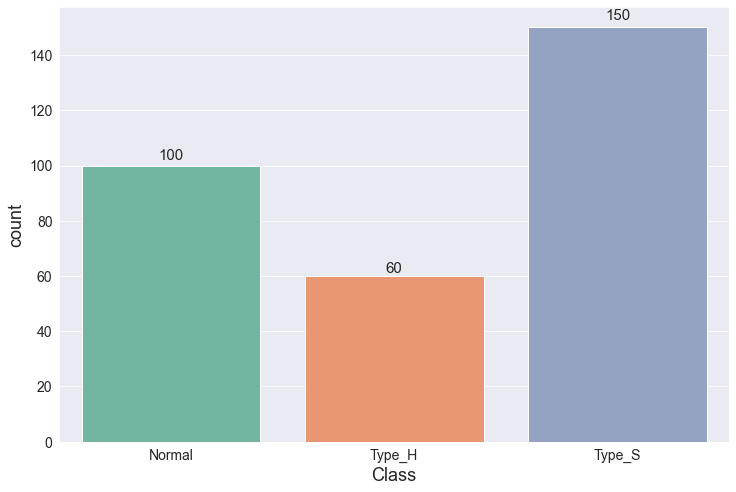

In [30]:
# Checking the frequency of our classes by visualizing it on a count-plot
fig , ax = plt.subplots() 
bar = sns.countplot(data=df,x='Class',palette='Set2',ax=ax)
for i in bar.patches: #label each rectangle
    height = i.get_height()
    ax.text(i.get_x()+i.get_width()/2,height*1.02,height,ha="center",fontsize=15)

We have three classes in our response variable, which is a categorical one.
* Normal : 100 
* Type-H : 60
* Type-S : 150

There seems to be a case of class imbalance but we have talked about this imbalance [here](#10), while doing model building.

Let's now analyze our predictor variables, which are all continuous variables.

In [31]:
df.describe() # Checking the mean, standard deviation and 5-point summary of all the variables

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


It appears that except <b>S_Degree</b> feature, rest of the features are almost normally distributed with a very less skewness, whereas, <b>S_Degree</b> does appear to be highly skewed towards the right.

This may be either due to its inherent nature or due to some anomaly present in the S_Degree data or there could have been manual mistakes while entering the data in the data-set. Let's find out with our further analysis by visualizing each feature.

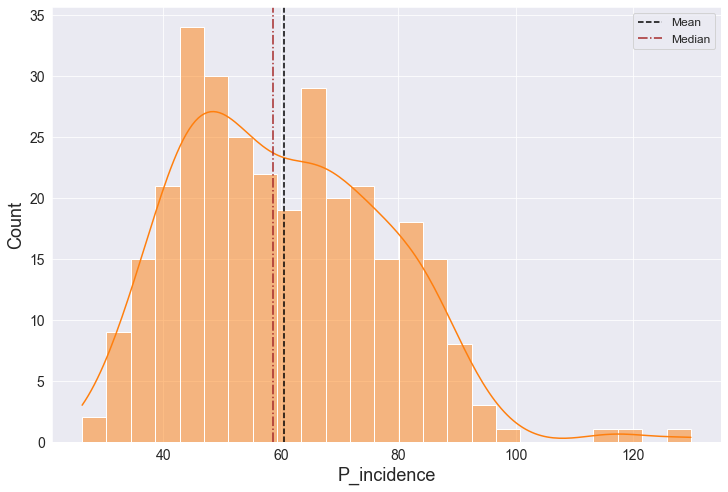

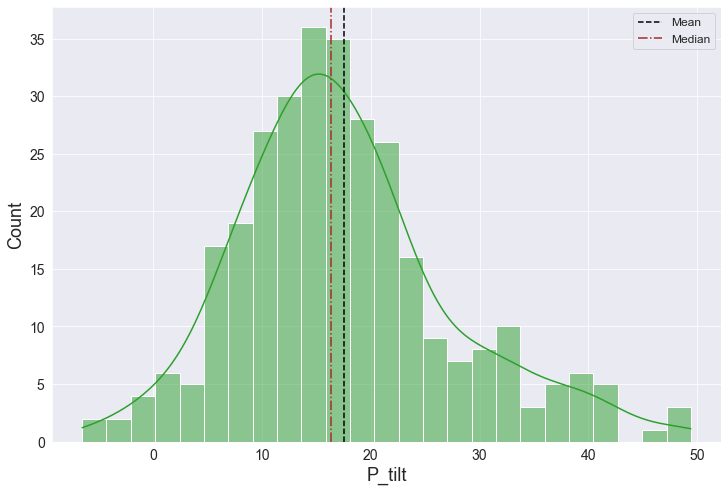

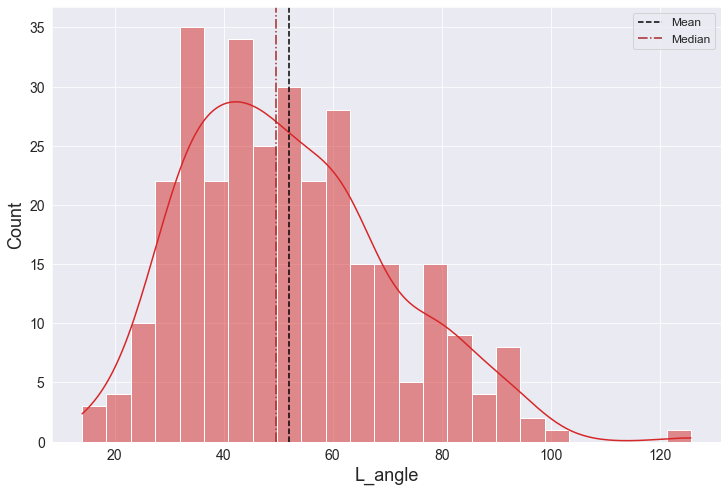

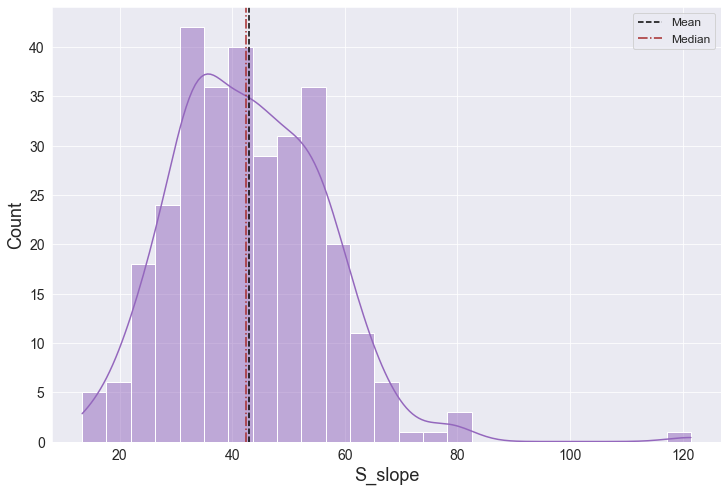

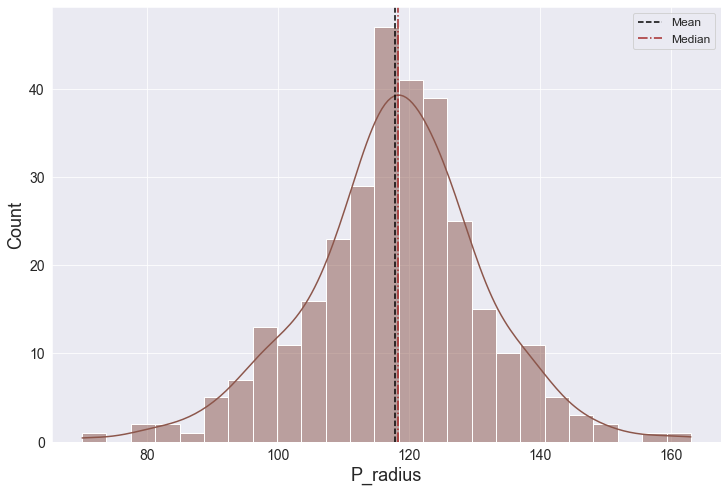

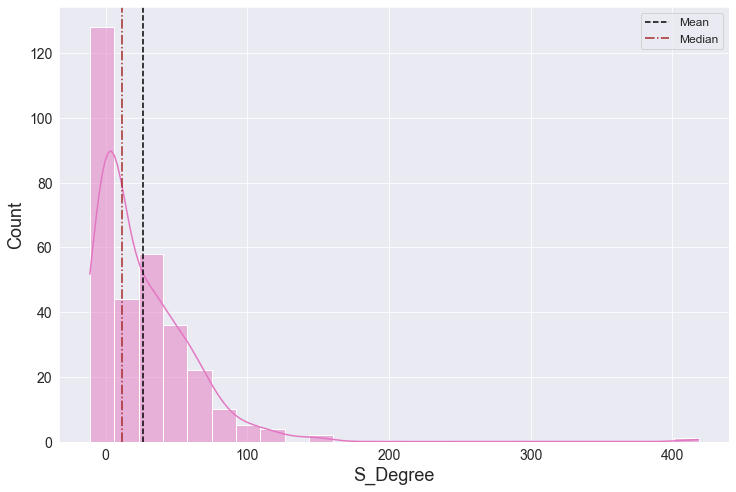

In [32]:
cols = df.select_dtypes(include='float64')
j=0
for i in cols:
    p = sns.histplot(data=df,x=i,color=sns.color_palette()[j+1],kde=True,bins=25)
    plt.axvline(df[i].mean(),label='Mean',c='black',linestyle='--')
    plt.axvline(df[i].median(),label='Median',c='brown',linestyle='-.')
    plt.legend()
    plt.show()
    j+=1

Here, we can see that in <b>S_Degree and S_Slope</b>, there are a few points which are skewing the data and have extreme values compared to the rest of the data in those features.

We can quantify our visual analysis of skewness by measuring the skewness of each feature.

In [33]:
df.skew()

P_incidence    0.520440
P_tilt         0.676553
L_angle        0.599451
S_slope        0.792577
P_radius      -0.176835
S_Degree       4.317954
dtype: float64

Here, we can see that <b>S_Degree and S_slope</b> have the highest skewness and that too due to some of the outliers. 

Let's first visualize our outliers in both of these features and then we will tackle them.

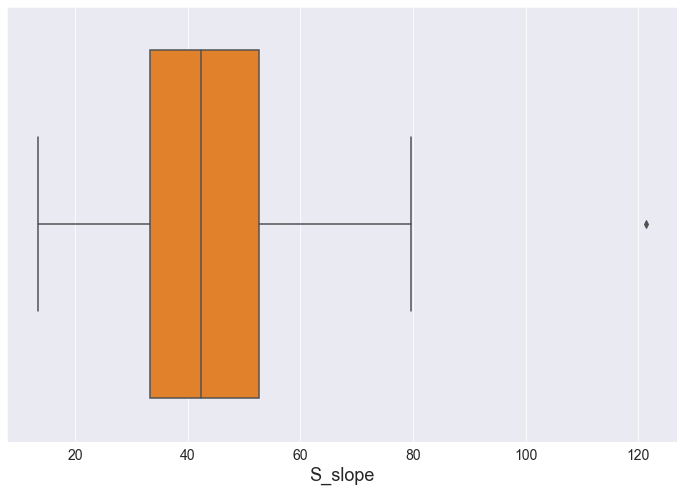

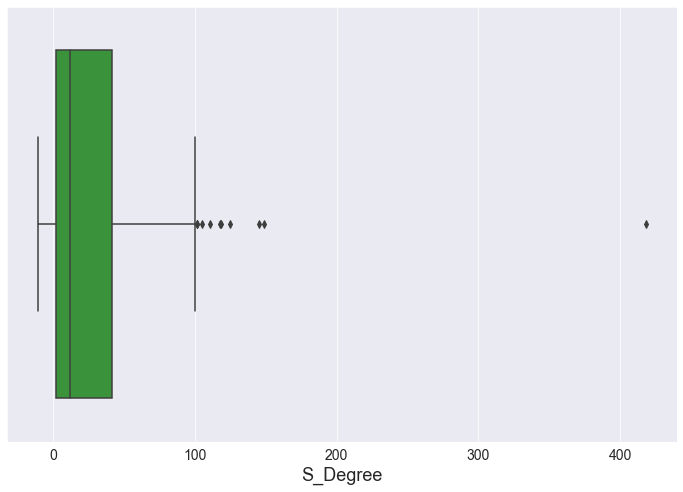

In [34]:
j=0
for i in ['S_slope','S_Degree']:
    p = sns.boxplot(data=df,x=i,color=sns.color_palette()[j+1])
    plt.show()
    j+=1

It is just one value in both the features which is skewing them towards the right. Let's find out that outlier and deal with it.

In [35]:
df[df['S_Degree'] > 300]

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
215,129.834041,8.404475,48.384057,121.429566,107.690466,418.543082,Type_S


The value of <b>S_Degree = 418.543082</b> is clearly either the typing mistake or a rare extreme
which can be taken as noise in the data. It is also noteworthy that the same observation has extreme
<b>S_slope = 121.429566</b> as well, which also defies the trend (although not as much as S_Degree is doing).


There are two ways to deal with the extreme value of S_Degree and corresponding S_slope value.
1. Delete the row. Since, both the values fall in the same observation, deleting it would not impact the predictive power of our data-set significantly. 
2. Impute the appropriate values.

It is not wise to delete a row as long as it doesn't have missing values for the majority of the attributes.

Hence, I am going to impute appropriate values.

Here, by appropriate values, I mean that instead of imputing the mean or median of the entire S_Degree and S_slope, I am going to impute the mean/median of S_Degree and S_slope of the Class that they belong to, which in my opinion is a reasonable value to impute. 

In [36]:
df.groupby('Class').median().T # Finding the median of all the features class-wise

Class,Normal,Type_H,Type_S
P_incidence,50.123115,46.416169,72.149306
P_tilt,13.482435,16.949285,19.309548
L_angle,42.638923,35.164873,62.555200
S_slope,37.059694,30.000659,50.751695
P_radius,123.874328,116.696146,114.842400
S_Degree,1.152710,2.542441,42.372509


Imputing the median of both the features respective to their classes in that outlier

In [37]:
df.loc[215,'S_Degree'] = df[df['Class'] == 'Type_S']['S_Degree'].median()
df.loc[215,'S_slope'] = df[df['Class'] == 'Type_S']['S_slope'].median()

<AxesSubplot:xlabel='S_Degree', ylabel='Count'>

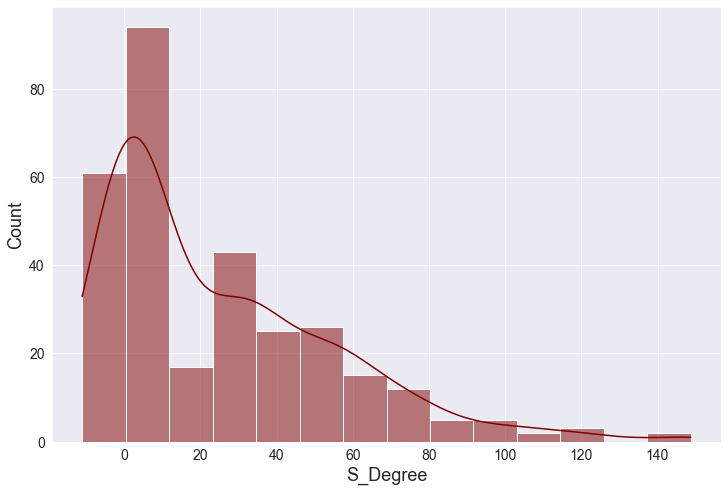

In [38]:
# Checking S_Degree's distribution after imputation
sns.histplot(data=df,x='S_Degree',color='maroon',kde=True) 

<AxesSubplot:xlabel='S_slope', ylabel='Count'>

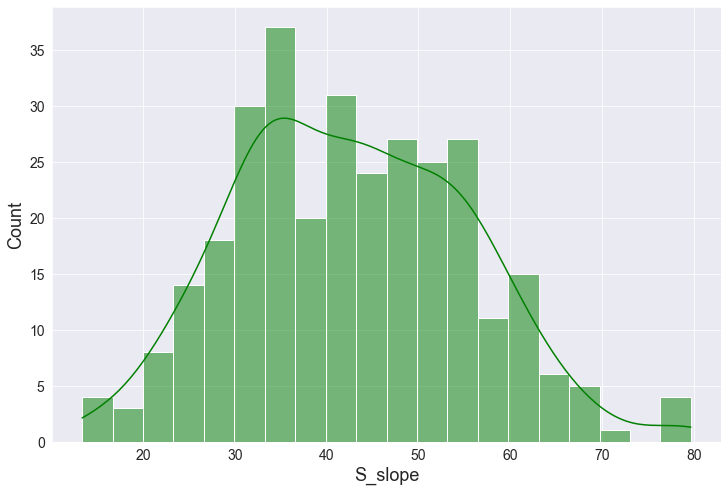

In [39]:
# Checking S_slope's distribution after imputation
sns.histplot(data=df,x='S_slope',color='green',kde=True,bins=20) 

In [40]:
# Checking the effect of imputing that value on skewness of both
df[['S_Degree','S_slope']].skew() 

S_Degree    1.290997
S_slope     0.223834
dtype: float64

As it can be seen that just by imputing one value, we have significantly reduced the skewness of S_Degree and to some extent skewness of our S_slope attribute as well.

Skewness of S_Degree has come down from <b>4.31 to 1.291</b>, which is an incredible reduction.

Similarly, skewness of S_slope has come down from <b>0.79 to 0.22</b>, simply by manipulating just one value. 

Even though, there is still scope for imputing values in the outliers that are still present, but we should be careful in not manipulating data too much to the extent that its inherent characterstics are changed. Hence, I will leave the rest of the data as it is. 

<b>Let's now do bi-variate analysis of our features.</b>

First, let's do bi-variate analysis of continuous variables and then we will do of continuous and categorical variable.

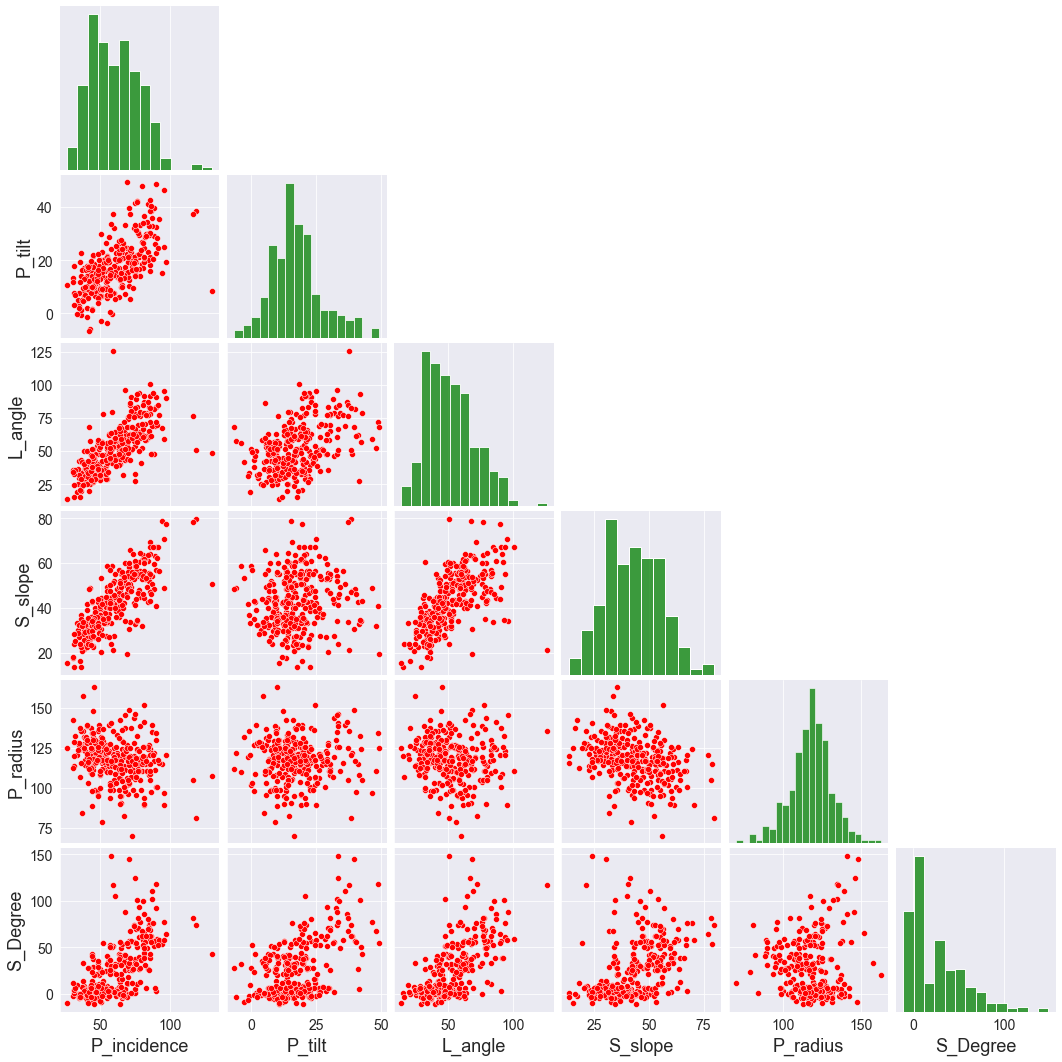

In [41]:
sns.pairplot(data=df,plot_kws=dict(markers='D',color='red'),diag_kws=dict(color='green'),corner=True)

Since we can see that many features are highly correlated like:
* P_incidence with (P_tilt, L_angle, S_slope and S_Degree)
* P_tilt with L_angle
* L_angle with (S_slope and S_Degree)
* S_slope with P_radius.

In many machine learning algorithms, the occurance of multi-collinearity creates a big problem, since many machine learning algorithms are based on an inherent assumption that all the features are independent of each-other. 


<b>Let's quantify our observation by finding correlation values of all the features.


<AxesSubplot:>

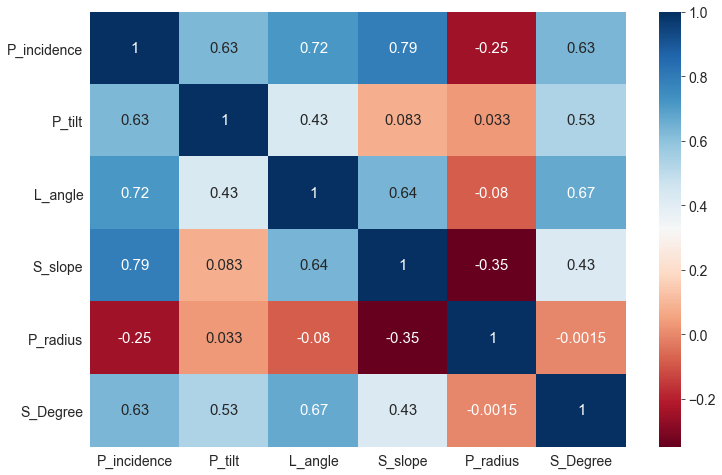

In [42]:
sns.heatmap(df.corr(),annot=True,cmap='RdBu',annot_kws={'size':15})

Correlation values proved that our observation was right and many features are highly correlated, like:
* P_incidence with (P_tilt, L_angle, S_slope and S_Degree)
* P_tilt with (P_incidence, L_angle and S_Degree)
* L_angle with (P_incidence, S_slope and S_Degree)
* S_slope with (P_incidence and L_angle) & is moderately correlated with (P_radius and S_Degree)
* P_radius moderately correlated with S_slope
* S_Degree with (P_incidence, P_tilt, L_angle and S_slope)

We either should use feature reduction techniques or should be careful in using a machine learning algorithm which is not affected by Multi-Collinearity. 

Here, we are going to choose the latter one and will use K-Nearest Neighbors method.

<b>Now we are going to do the bivariate visualization of continuous and categorical variables.

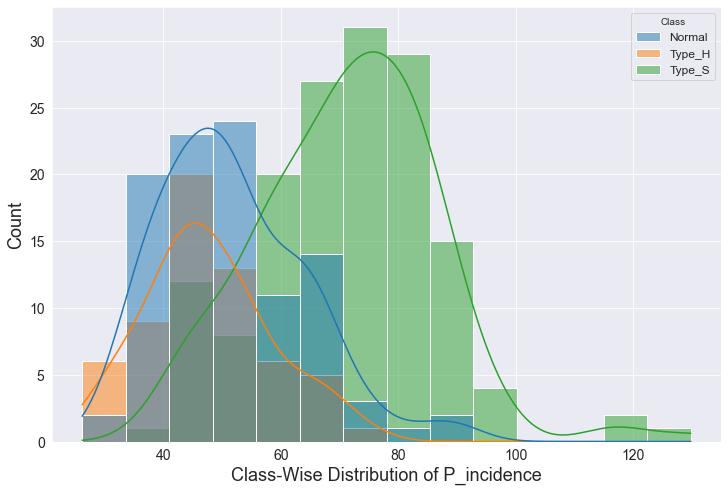

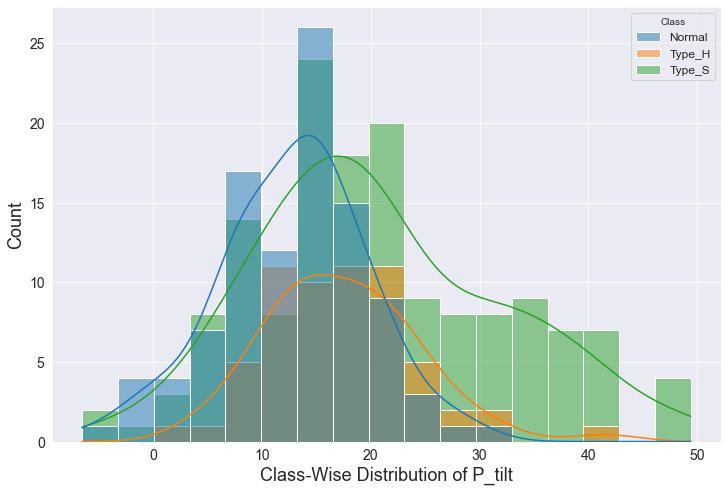

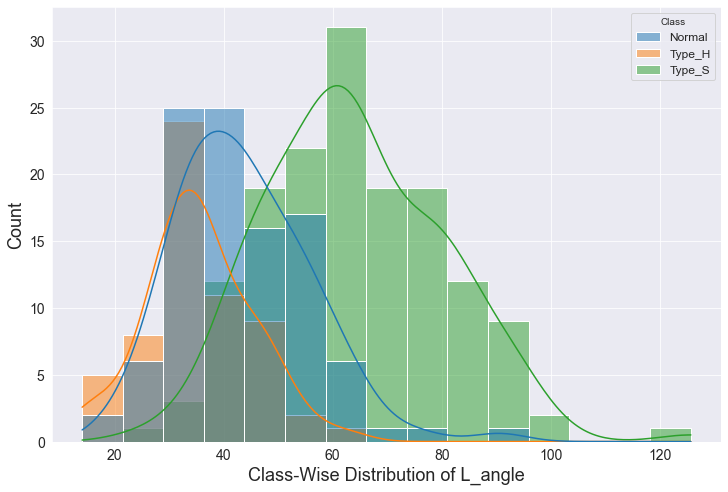

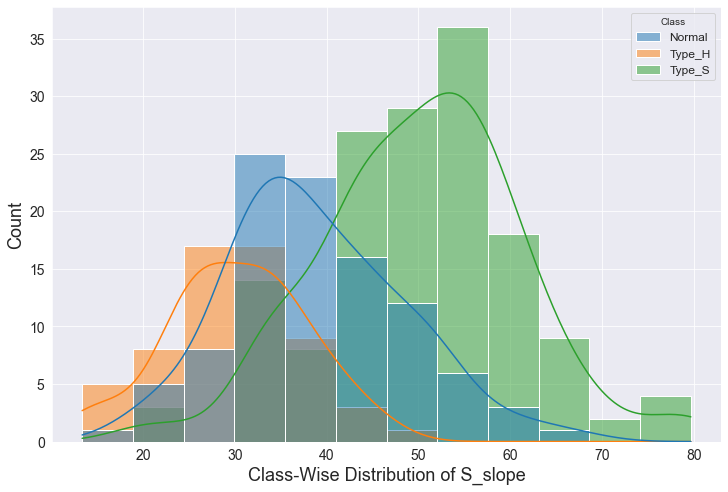

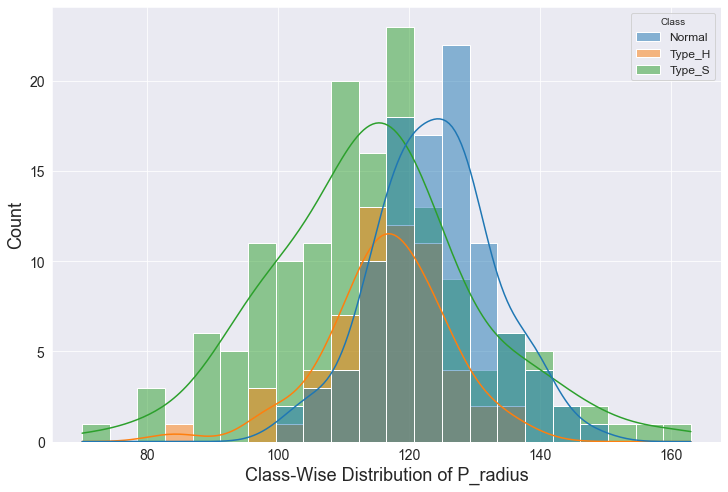

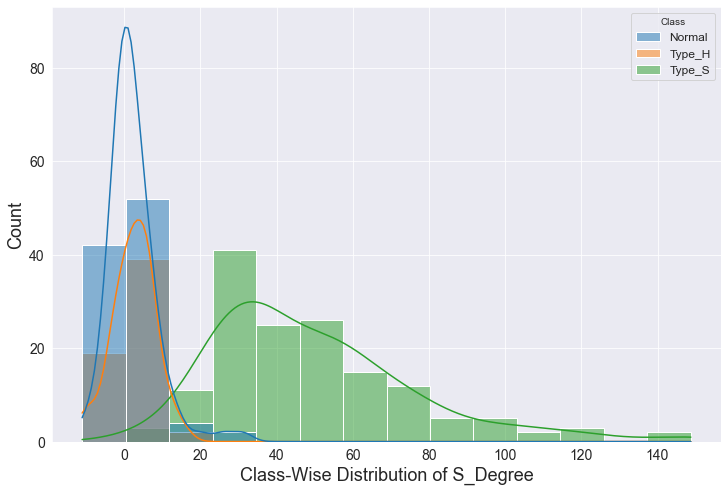

In [43]:
cols = df.select_dtypes(include='float64')
j=0
for i in cols:
    plt.figure(figsize=(12,8))
    p = sns.histplot(data=df,x=i,hue='Class',kde=True)
    _ = p.set(xlabel="Class-Wise Distribution of %s" %i)
    plt.show()
    j+=1

As we can see that in all the features, all three classes are either clearly have different means or if two classes have the similar mean then their standard deviation vary greatly. It is indicative that all three classes are clearly separable in most of the features. 

<b>Type_S</b> is clearly separable in all the features while <b>Normal and Type_H</b> in some of the features have similar mean but certainly have different standard deviation.

<b>Let's have a look at the means and standard deviation of all the features class-wise</b>

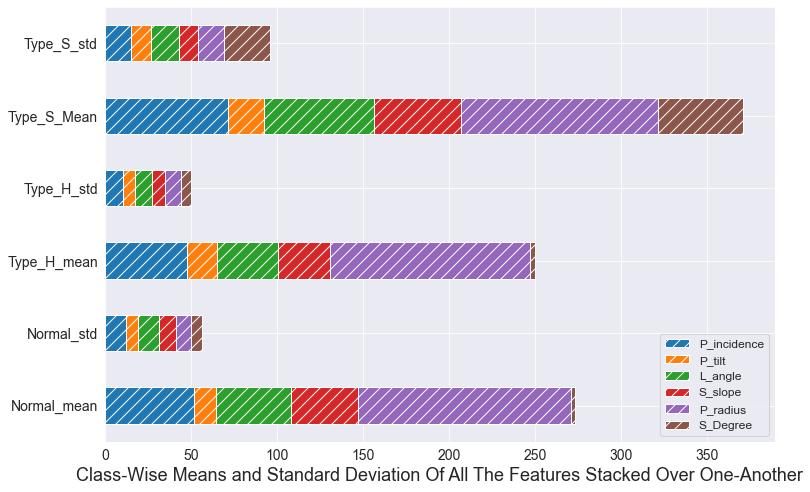

In [44]:
me = df.groupby('Class').mean()
me.index = ['Normal_mean','Type_H_mean','Type_S_Mean']
st = df.groupby('Class').std()
st.index = ['Normal_std','Type_H_std','Type_S_std']
p = pd.concat([me,st],axis=0).sort_index().plot.barh(stacked=True,hatch='//')
_ = p.set(xlabel='Class-Wise Means and Standard Deviation Of All The Features Stacked Over One-Another')

This above graph gives us the idea that classes in each feature either have different mean or have different standard deviation. 

<b>Now, let's quantify that these differences of classes in each feature are statistically significant or not. We will also view pair-wise analysis to see which classes in each feature belong to separate populations and which does not. </b> <br>

But before that let's see which test we are going to perform and set the rules for it:

<b>For Predictor variables, which are all continuous, w.r.t. our target variable, i.e., Class, we will perform ANOVA test</b><br>

1. What is ANOVA test?<br>

ANOVA(Analysis Of Variance) test is a hypothesis testing technique which tests the equality of two or more population means by examining the variances of samples that are taken.

2. Define Null and Alternate Hypothesis:

* $H_0$: Means(i.e. $\mu$) of all the samples are same.
* $H_A$: At least one mean (i.e., $\mu$) differs

3. Let's decide our significance level:

### <center>$\alpha$ = 0.05</center>

4. Let's identify our test statistic:

ANOVA uses F-tests and F-statistic to statistically test the equality of means

5. Set the rules to accept or reject the Null Hypothetis:

* If p-value comes out to be greater than our significance level, i.e., 0.05, then we will fail to reject Null Hypothesis.
* If p-value comes out to be less than our significance level, we will reject our Null Hypothesis.


		 Visual Representation of Distribution of Classes in P_incidence



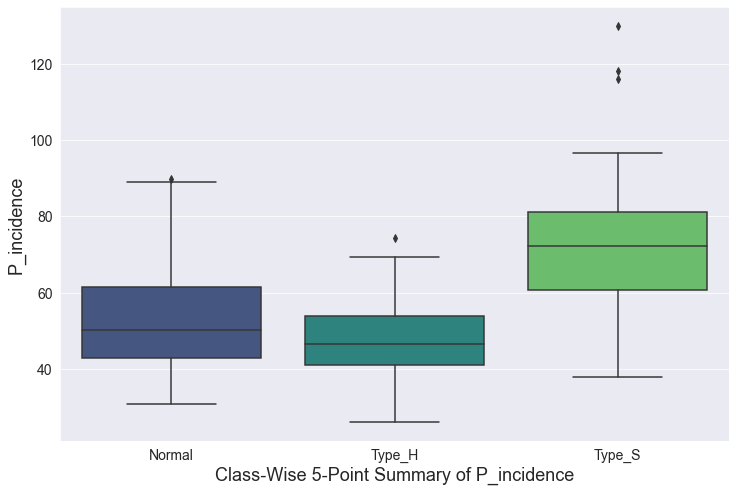

----------------------------------------------------------------------------------------------------
			 Statistical Analysis of P_incidence 

                sum_sq     df          F        PR(>F)
Class     35892.191585    2.0  98.539709  8.752849e-34
Residual  55910.976950  307.0        NaN           NaN


.................................................................................................... 

		 Pair-wise Statistical Analysis of Every Class Pair in P_incidence 

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
Normal Type_H  -4.0468 0.1597 -9.2373  1.1436  False
Normal Type_S   19.829  0.001 15.7256 23.9324   True
Type_H Type_S  23.8758  0.001 19.0206  28.731   True
----------------------------------------------------
____________________________________________________________________________________________________

		 Visual Representation of Distribution of

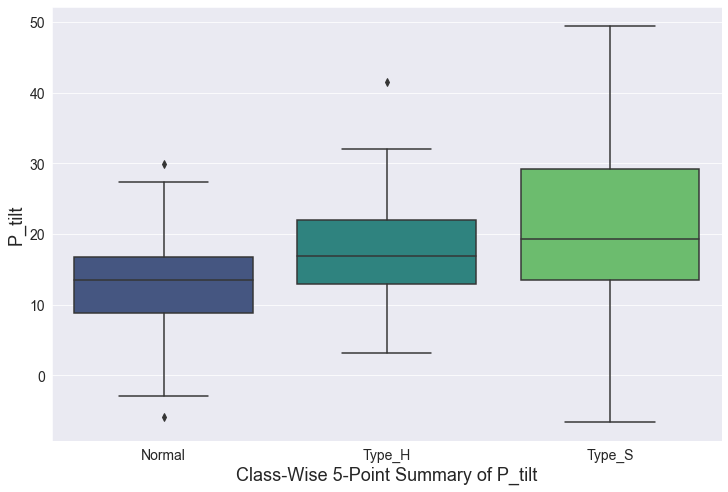

----------------------------------------------------------------------------------------------------
			 Statistical Analysis of P_tilt 

                sum_sq     df          F        PR(>F)
Class      3771.425079    2.0  21.299194  2.176879e-09
Residual  27180.077360  307.0        NaN           NaN


.................................................................................................... 

		 Pair-wise Statistical Analysis of Every Class Pair in P_tilt 

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
Normal Type_H   4.5774 0.0087  0.9585  8.1963   True
Normal Type_S   7.9266  0.001  5.0656 10.7876   True
Type_H Type_S   3.3492 0.0532 -0.0359  6.7344  False
----------------------------------------------------
____________________________________________________________________________________________________

		 Visual Representation of Distribution of Classes i

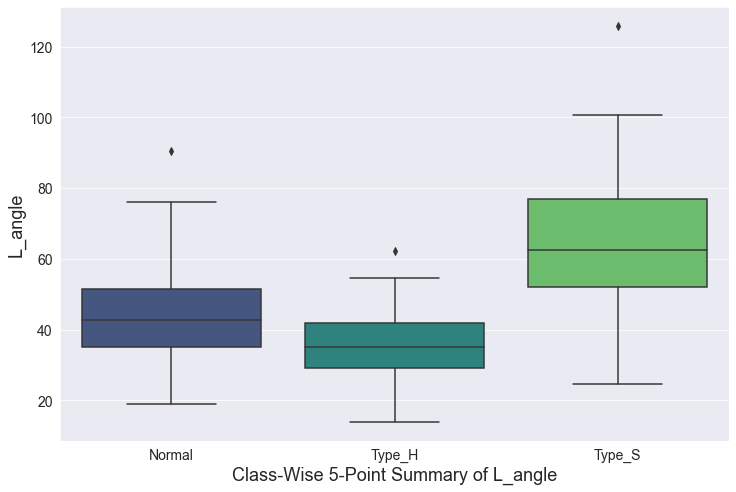

----------------------------------------------------------------------------------------------------
			 Statistical Analysis of L_angle 

                sum_sq     df          F        PR(>F)
Class     45556.786013    2.0  114.98284  5.357329e-38
Residual  60817.480453  307.0        NaN           NaN


.................................................................................................... 

		 Pair-wise Statistical Analysis of Every Class Pair in L_angle 

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
Normal Type_H  -8.0791 0.0015 -13.4925 -2.6657   True
Normal Type_S  20.5675  0.001  16.2879 24.8472   True
Type_H Type_S  28.6466  0.001  23.5828 33.7103   True
-----------------------------------------------------
____________________________________________________________________________________________________

		 Visual Representation of Distribution of 

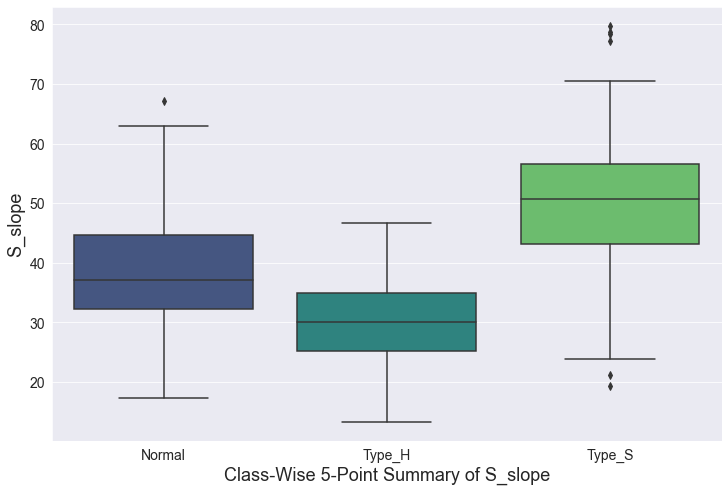

----------------------------------------------------------------------------------------------------
			 Statistical Analysis of S_slope 

                sum_sq     df          F        PR(>F)
Class     19439.692980    2.0  99.063316  6.365017e-34
Residual  30122.077268  307.0        NaN           NaN


.................................................................................................... 

		 Pair-wise Statistical Analysis of Every Class Pair in S_slope 

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
Normal Type_H  -8.6242 0.001 -12.434 -4.8145   True
Normal Type_S  11.4312 0.001  8.4193  14.443   True
Type_H Type_S  20.0554 0.001 16.4917 23.6191   True
---------------------------------------------------
____________________________________________________________________________________________________

		 Visual Representation of Distribution of Classes in P_r

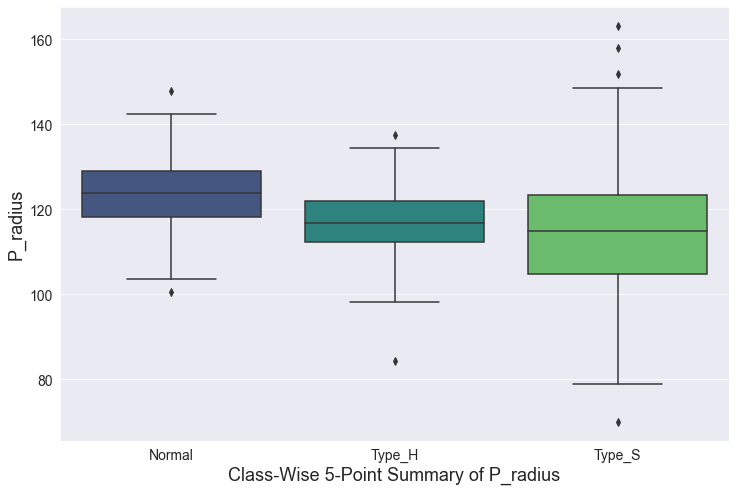

----------------------------------------------------------------------------------------------------
			 Statistical Analysis of P_radius 

                sum_sq     df          F        PR(>F)
Class      5425.586931    2.0  16.866935  1.121996e-07
Residual  49376.345258  307.0        NaN           NaN


.................................................................................................... 

		 Pair-wise Statistical Analysis of Every Class Pair in P_radius 

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
Normal Type_H  -7.4159 0.0012 -12.2935 -2.5382   True
Normal Type_S   -9.372  0.001 -13.2282 -5.5159   True
Type_H Type_S  -1.9562 0.5665  -6.5188  2.6065  False
-----------------------------------------------------
____________________________________________________________________________________________________

		 Visual Representation of Distribution o

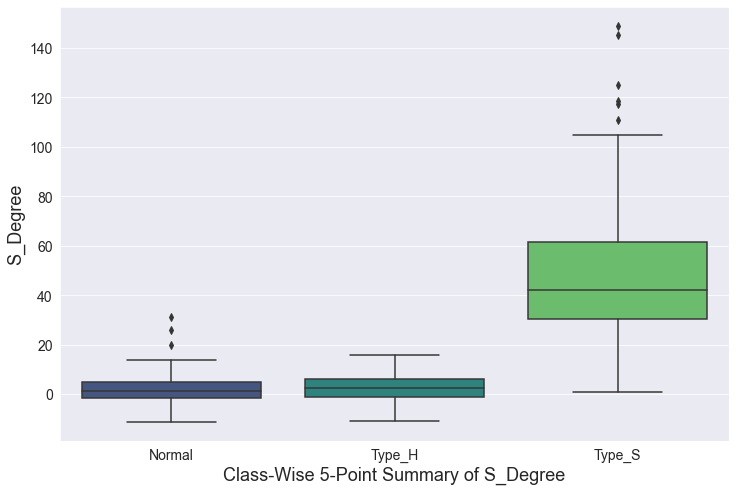

----------------------------------------------------------------------------------------------------
			 Statistical Analysis of S_Degree 

                 sum_sq     df           F        PR(>F)
Class     171694.090882    2.0  239.263044  2.336612e-63
Residual  110150.913836  307.0         NaN           NaN


.................................................................................................... 

		 Pair-wise Statistical Analysis of Every Class Pair in S_Degree 

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
Normal Type_H   0.2937   0.9 -6.9916   7.579  False
Normal Type_S  47.2023 0.001 41.4428 52.9619   True
Type_H Type_S  46.9086 0.001 40.0939 53.7234   True
---------------------------------------------------
____________________________________________________________________________________________________



In [45]:
cols = df.select_dtypes(include='float64')
start = "\033[1m"
end = '\033[0m'
for i in cols:
    plt.figure(figsize=(12,8))
    print(start+"\t\t Visual Representation of Distribution of Classes in %s" %i +end + '\n')
    p = sns.boxplot(data=df,x='Class',y=i,palette='viridis')
    _ = p.set(xlabel="Class-Wise 5-Point Summary of %s" %i)
    plt.show()
    
    print('-'*100)
    
    print(start+"\t\t\t Statistical Analysis of %s \n" %i + end)
    data = df[[i,'Class']].copy(deep=True)
    mod = ols('%s ~ Class' %i, data=data).fit()
    anova_tb = sm.stats.anova_lm(mod,typ=2)
    print(anova_tb)
    print('\n')
    
    print('.'*100,'\n')
    
    print(start+ "\t\t Pair-wise Statistical Analysis of Every Class Pair in %s \n" %i +end)
    print(pairwise_tukeyhsd(data[i],data['Class']))
    
    print('_' *100 + '\n')

<b>Conclusions of the statistical analysis:</b><br>
This statistical analysis proves that our observation was right. That all the classes in most of the features are clearly separable with statistically significant differences. That means we can comfortably reject Null Hypothesis for all the features.

Although, in pair-wise analysis, we can see that a few pairs don't have statistically significant differences, like:

* In P_incidence : Normal and Type_H don't have statistically significant difference.
* in P_tilt : Type_H and Type_S don't have statistically significant difference.
* In P_radius : Type_H and Type_S don't have statistically significant difference.
* In S_Degree : Normal and Type_H don't have statistically significant difference.

These differences can also be visualized in the respective boxplots of all the features class-wise.

<b> Now, let's do multi-variate analysis:</b>
We can only visualize 2 contiuous variables and 1 categorical variable together. Beyond that, visualization becomes difficult. Hence, we are going to stick to 3 variables at a time.

<Figure size 3600x2400 with 0 Axes>

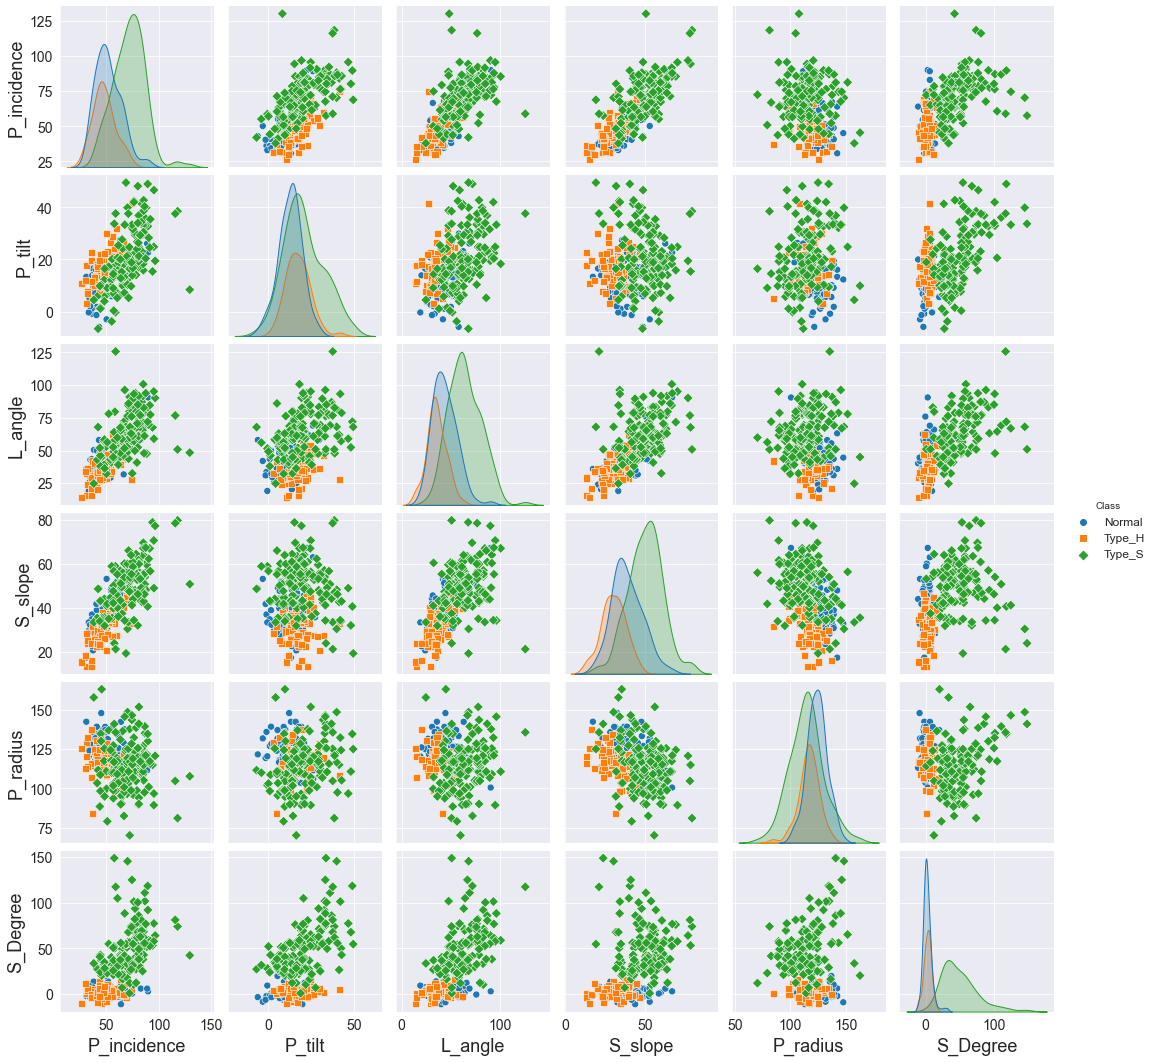

In [46]:
plt.figure(dpi=300)
sns.pairplot(data=df,hue='Class',markers=['o','s','D'],plot_kws={'s':50})

We can see that even for every combination of the attributes, there is only a slight overlap of the three classes and for the most part, they are easily separated. Even in our statistical analysis, we have seen that in all the attributes, most of the times the three classes are significantly different from each-other.

This is a good sign and would be helpful in better predictions of from our model.

<a id='4'> </a>
## 4. Data pre-processing:

<b>Let's first segregate our predictor and target variables:

In [47]:
X = df.drop(['Class'],axis=1)
y = df['Class']

In K-NN, scaling the data is very important since in unscaled data, units of the features could play a crucial role in deciding the groupings of data-points to vote for nearest neighbors.

<b>Let's scale our data first.</b>
In general we assume that the features in the data are normally distributed but this could be wrong for some features as well. So, we are going to try 2 types of scaler:
* StandardScaler
* MinMaxScaler<br>
And see, which one is giving us the better results.

In [48]:
std_scaler = StandardScaler() # Defining the instance of Class StandardScaler for scaling the data

mms_scaler = MinMaxScaler() # Defining the instance of Class MinMaxScaler for scaling the data

Even though I have defined the instance of StandardScaler and MinMaxScaler, I will fit it on only our training data to prevent the data leakage from training to test data. Hence, I will scale only after spliting the data.

<a id='10'></a>This is the right time to discuss our class imbalance. 

### Is our Class Distribution imbalanced?

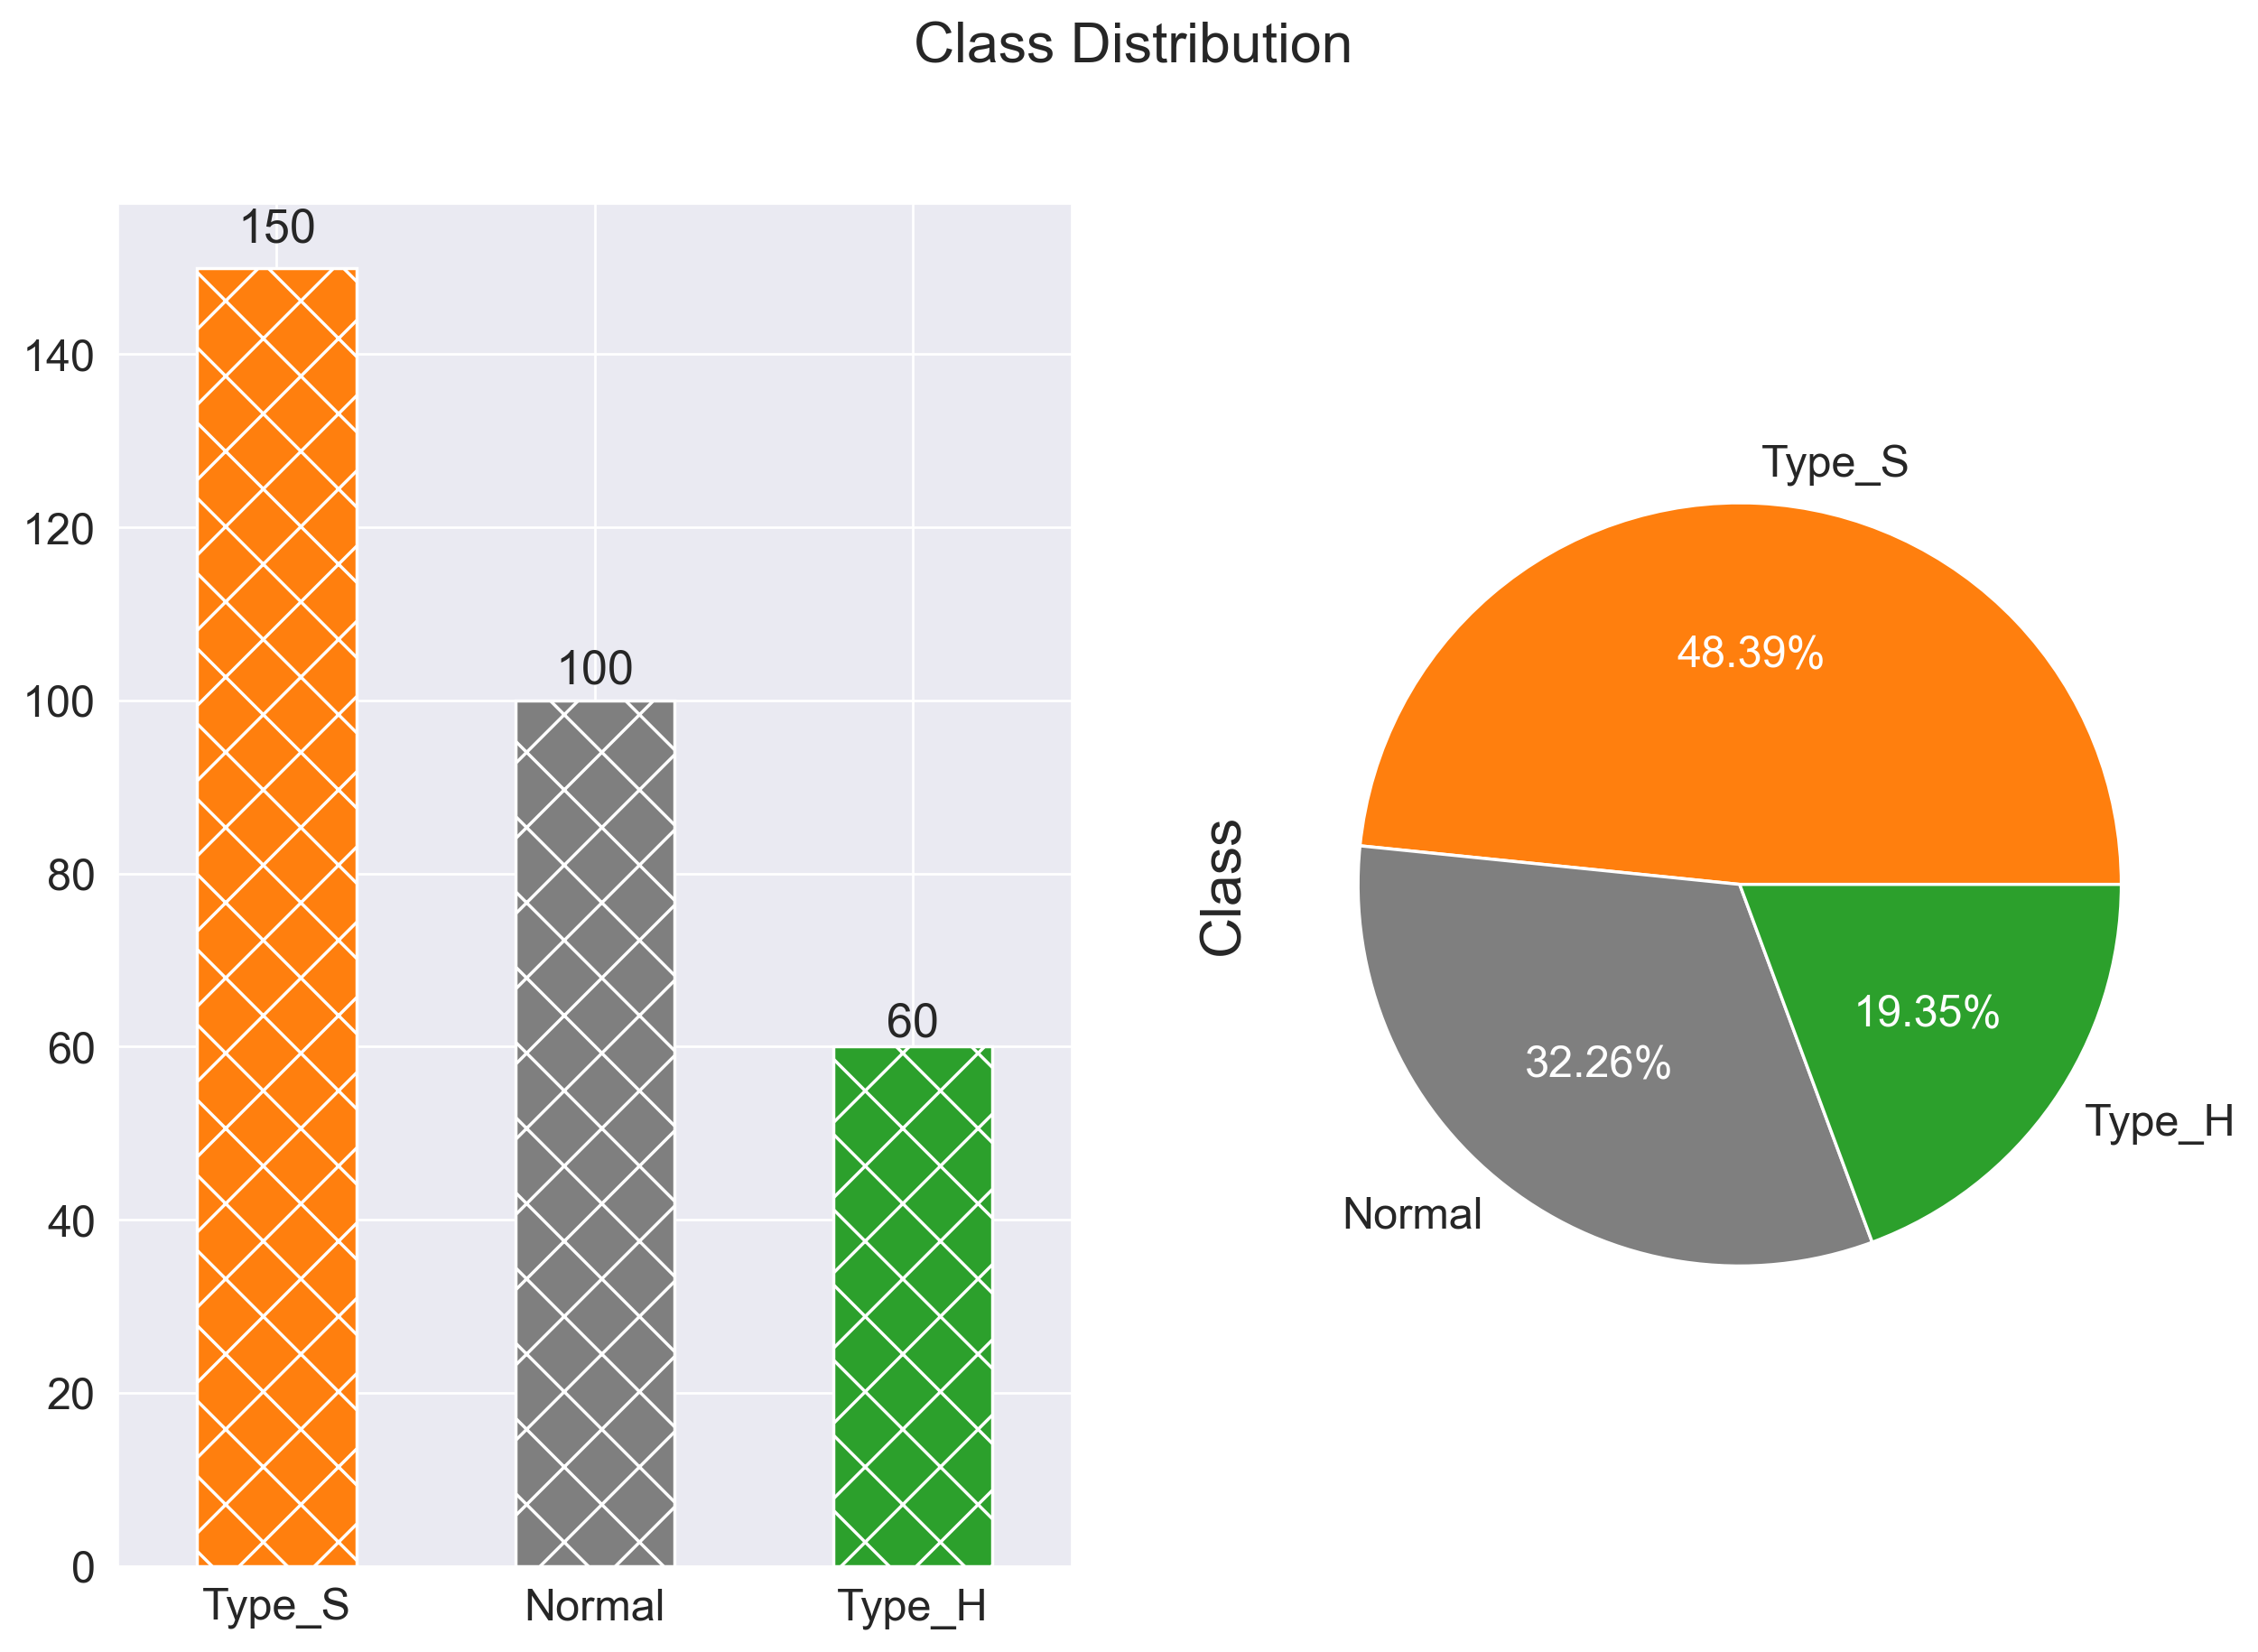

In [49]:
fig , ax = plt.subplots(1,2,dpi=250)

fig.suptitle('Class Distribution',fontsize=18.)

bar = df['Class'].value_counts().plot.bar(ax=ax[0],
rot=0,color=[sns.color_palette()[1],sns.color_palette()[7],sns.color_palette()[2]],hatch='x')
for i in bar.patches: 
    height = i.get_height()
    ax[0].text(i.get_x()+i.get_width()/2,height*1.02,height,ha="center",fontsize=15)

_ = df['Class'].value_counts().plot.pie(ax=ax[1],autopct="%.2f%%",fontsize=14.,
colors=[sns.color_palette()[1],sns.color_palette()[7],sns.color_palette()[2]]),
ax[1].texts[1].set_color('white'),ax[1].texts[3].set_color('white'),ax[1].texts[5].set_color('white')
ax[1].set_ylabel("")
plt.show()

As we can see, classes in our data-set are imbalanced and have following percentages of observations:

Class -----|---- Percentage

Type_S ----|---- 48.39%

Normal ----|---- 32.26%

Type_H ----|---- 19.35%

Firstly, I will take our data-set as it is without dealing with class imbalance and will see the accuracy to evaluate the performance of our model.

Secondly, I will use stratifying technique while spliting our data into training and validation set, i.e., will split our data into training and validation set in the same proportion of classes as it is in our data-set.

Then I will use an over-sampling techniques (not under-sampling, since we have a small data-set) namely:
* <b>SMOTE (Synthetic Minority Oversampling Technique)</b>: It basically creates synthetic samples of the minority classes to make all the class equal in number so that no particular class could dominate the predictions.

After that, I will compare the metrics of all the methods used and then will use the appropriate method to move forward to tuning our parameters using that method.

<b> Let's split the data in all the three ways mentioned above: </b>
* Without any optimization.
* In an stratified way.
* First over-sample the minority classes using SMOTE and then split them
    

In [50]:
# Spliting using method 1, where class imbalance is not taken into consideration
X_train_plain, X_test_plain, y_train_plain, y_test_plain = train_test_split(X, 
                                                            y, test_size=0.3, random_state=108)

In [51]:
# Spliting using method 2, where train and test data is split in equal proportion of classes
X_train_stratified, X_test_stratified, y_train_stratified, y_test_stratified = train_test_split(X, 
                                                    y, test_size=0.3, random_state=108,stratify=y)

In [52]:
smote = SMOTE(random_state=108) # Creating an instance of over-sampling method- SMOTE

<AxesSubplot:>

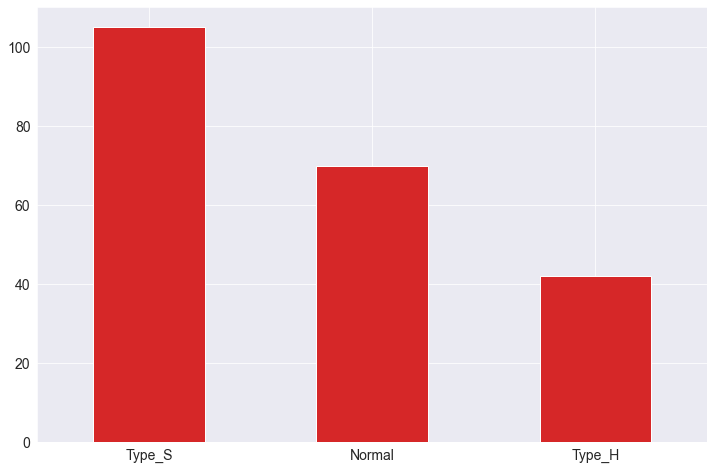

In [53]:
# Class distribution in y_train before over-sampling
y_train_stratified.value_counts().plot.bar(rot=0,color=sns.color_palette()[3])

I am only going to over-sample the training data, since I am going to fit my model on my train data only. Once the model is trained, then it doesn't matter whether test data has class imbalance or not, it should be able to predict accurately.

In [54]:
X_train_smote , y_train_smote = smote.fit_resample(X_train_stratified,y_train_stratified)

<AxesSubplot:>

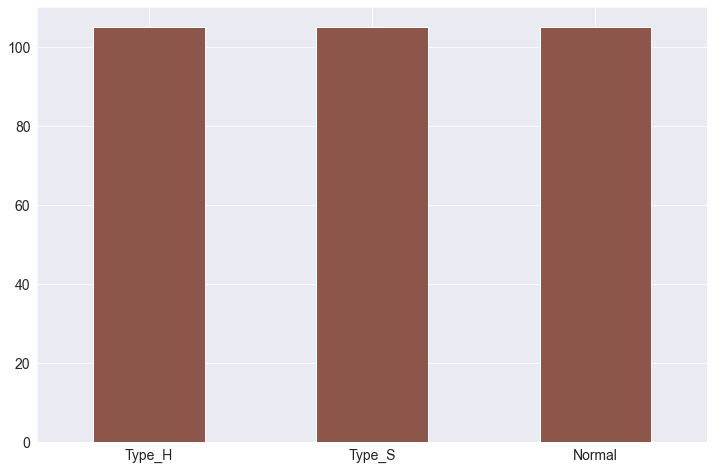

In [55]:
# Class distribution in y_train_smote after over-sampling
y_train_smote.value_counts().plot.bar(rot=0,color=sns.color_palette()[5])

As we can see, after over-sampling our data, we have balanced our classes. Hence, one class won't be able to dominate the predictions on unseen data by the model.

<b> Let's scale our data now.

In [56]:
# Let's scale our training data using instance of StandardScaler
X_tr_pl_std_scaled = std_scaler.fit_transform(X_train_plain)
X_tr_stratified_std_scaled = std_scaler.fit_transform(X_train_stratified)
X_tr_smote_std_scaled = std_scaler.fit_transform(X_train_smote)

# Let's scale our training data using instance of MinMaxScaler
X_tr_pl_mms_scaled = mms_scaler.fit_transform(X_train_plain)
X_tr_stratified_mms_scaled = mms_scaler.fit_transform(X_train_stratified)
X_tr_smote_mms_scaled = mms_scaler.fit_transform(X_train_smote)

In [57]:
# Let's scale our test data using StandardScaler
X_te_pl_std_scaled = std_scaler.transform(X_test_plain)
X_te_stratified_std_scaled = std_scaler.transform(X_test_stratified)

#Let's scale our test data using MinMaxScaler
X_te_pl_mms_scaled = mms_scaler.transform(X_test_plain)
X_te_stratified_mms_scaled = mms_scaler.transform(X_test_stratified)

Note that there is no test data for SMOTE method since we can use stratified test data in SMOTE method as well, since we have formed synthetic samples over stratified training data only. 

<a id='5'> </a>
## 5. Model training, testing and tuning:

Let's first evaluate our all three K-NN models for StandardScaler

In [58]:
plain_score_train = []
plain_score_test = []
stratified_score_train = []
stratified_score_test = []
smote_score_train = []
smote_score_test = []

for k in range(1,30,2):
    # Let's create instance of K-NN for all three types
    knn_plain = KNeighborsClassifier(n_neighbors=k, weights='distance')
    knn_stratified = KNeighborsClassifier(n_neighbors=k, weights='distance')
    knn_smote = KNeighborsClassifier(n_neighbors=k, weights='distance')
    
    # Let's fit all three models
    knn_plain.fit(X_tr_pl_std_scaled,y_train_plain)
    knn_stratified.fit(X_tr_stratified_std_scaled,y_train_stratified)
    knn_smote.fit(X_tr_smote_std_scaled,y_train_smote)
    
    # Let's gather the training score for all three models
    plain_score_train.append(knn_plain.score(X_tr_pl_std_scaled,y_train_plain))
    stratified_score_train.append(knn_stratified.score(X_tr_stratified_std_scaled,y_train_stratified))
    smote_score_train.append(knn_smote.score(X_tr_smote_std_scaled,y_train_smote))
    
    #Let's gather the testing score for all three models
    plain_score_test.append(knn_plain.score(X_te_pl_std_scaled,y_test_plain))
    stratified_score_test.append(knn_stratified.score(X_te_stratified_std_scaled,y_test_stratified))
    smote_score_test.append(knn_smote.score(X_te_stratified_std_scaled,y_test_stratified))
    
    

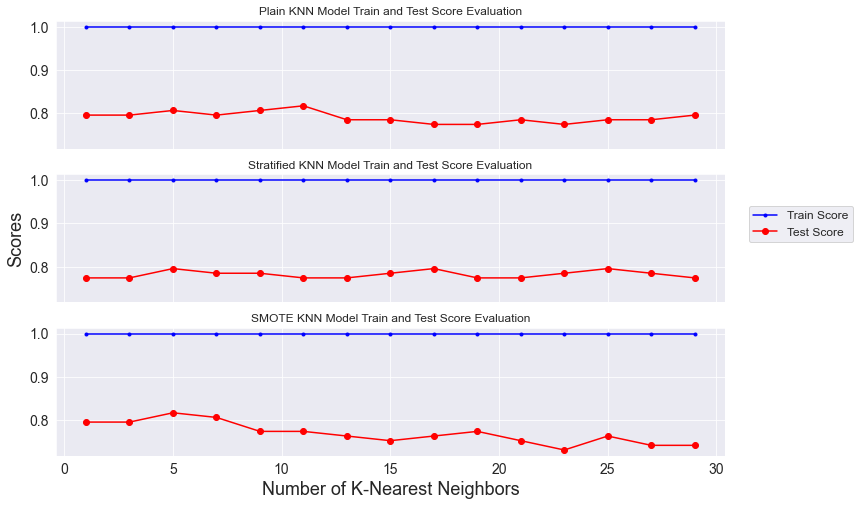

In [76]:
# Let's visualize the training and test scores for all the three methods using StandardScaler

fig, ax = plt.subplots(3,1,sharex=True,sharey=True)

ax[0].plot(range(1,30,2),plain_score_train,'b.-',label='Train Score')
ax[0].plot(range(1,30,2),plain_score_test,'r-o',label='Test Score')
ax[0].set_title("Plain KNN Model Train and Test Score Evaluation")

ax[1].plot(range(1,30,2),stratified_score_train,'b.-',label='Train Score')
ax[1].plot(range(1,30,2),stratified_score_test,'r-o',label='Test Score')
ax[1].set_title("Stratified KNN Model Train and Test Score Evaluation")
ax[1].set_ylabel("Scores")

ax[2].plot(range(1,30,2),smote_score_train,'b.-',label='Train Score')
ax[2].plot(range(1,30,2),smote_score_test,'r-o',label='Test Score')
ax[2].set_title("SMOTE KNN Model Train and Test Score Evaluation")
ax[2].set_xlabel("Number of K-Nearest Neighbors")

plt.legend(bbox_to_anchor=[1.2,2])

As we can see that all the models are performing more or less the same using the StandardScaler scaling method. 

Even though, all are performing similarly, stratified method is more stable and consistent.

SMOTE didn't perform better than stratified or Plain may be because even though we have class imbalance but it isn't steeply imbalanced to the extent that one class starts dominating over the predictions on unseen data. 


<b>Now let's evaluate all three KNN models with the data scaled using MinMaxScaler:

In [60]:
plain_score_train = []
plain_score_test = []
stratified_score_train = []
stratified_score_test = []
smote_score_train = []
smote_score_test = []

for k in range(1,30,2):
    # Let's create instance of K-NN for all three types
    knn_plain = KNeighborsClassifier(n_neighbors=k, weights='distance')
    knn_stratified = KNeighborsClassifier(n_neighbors=k, weights='distance')
    knn_smote = KNeighborsClassifier(n_neighbors=k, weights='distance')
    
    # Let's fit all three models
    knn_plain.fit(X_tr_pl_mms_scaled,y_train_plain)
    knn_stratified.fit(X_tr_stratified_mms_scaled,y_train_stratified)
    knn_smote.fit(X_tr_smote_mms_scaled,y_train_smote)
    
    # Let's gather the training score for all three models
    plain_score_train.append(knn_plain.score(X_tr_pl_mms_scaled,y_train_plain))
    stratified_score_train.append(knn_stratified.score(X_tr_stratified_mms_scaled,y_train_stratified))
    smote_score_train.append(knn_smote.score(X_tr_smote_mms_scaled,y_train_smote))
    
    #Let's gather the testing score for all three models
    plain_score_test.append(knn_plain.score(X_te_pl_mms_scaled,y_test_plain))
    stratified_score_test.append(knn_stratified.score(X_te_stratified_mms_scaled,y_test_stratified))
    smote_score_test.append(knn_smote.score(X_te_stratified_mms_scaled,y_test_stratified))

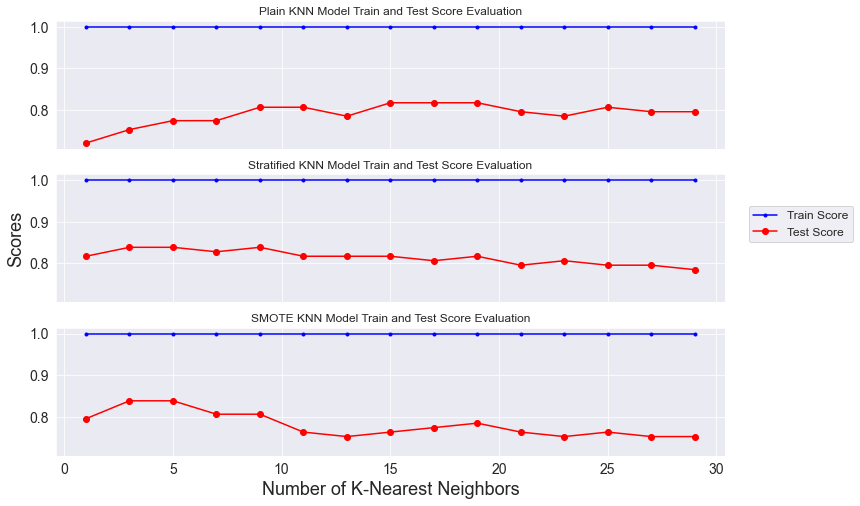

In [61]:
# Let's visualize the training and test scores for all the three methods using MinMaxScaler

fig, ax = plt.subplots(3,1,sharex=True,sharey=True)

ax[0].plot(range(1,30,2),plain_score_train,'b.-',label='Train Score')
ax[0].plot(range(1,30,2),plain_score_test,'r-o',label='Test Score')
ax[0].set_title("Plain KNN Model Train and Test Score Evaluation")

ax[1].plot(range(1,30,2),stratified_score_train,'b.-',label='Train Score')
ax[1].plot(range(1,30,2),stratified_score_test,'r-o',label='Test Score')
ax[1].set_title("Stratified KNN Model Train and Test Score Evaluation")
ax[1].set_ylabel("Scores")

ax[2].plot(range(1,30,2),smote_score_train,'b.-',label='Train Score')
ax[2].plot(range(1,30,2),smote_score_test,'r-o',label='Test Score')
ax[2].set_title("SMOTE KNN Model Train and Test Score Evaluation")
ax[2].set_xlabel("Number of K-Nearest Neighbors")

plt.legend(bbox_to_anchor=[1.2,2])

Here, we can see that both Stratified and SMOTE method are performing much better than Plain method.

Not just that, Stratified and SMOTE methods using MinMaxScaler scaled data is performing better than these methods using StandardScaler scaled data, which is indicative that for this data-set, MinMaxScaler is a better scaling method than StandardScaler.

Let's see which one is giving the best accuracy between Stratified and SMOTE and then we are finally going to consider only MinMaxScaler for scaling and that highest accuracy KNN method for further evaluation.

In [62]:
print("Stratified Scores are:",stratified_score_test)
print("\n")
print("SMOTE scores are:",smote_score_test)

Stratified Scores are: [0.8172043010752689, 0.8387096774193549, 0.8387096774193549, 0.8279569892473119, 0.8387096774193549, 0.8172043010752689, 0.8172043010752689, 0.8172043010752689, 0.8064516129032258, 0.8172043010752689, 0.7956989247311828, 0.8064516129032258, 0.7956989247311828, 0.7956989247311828, 0.7849462365591398]


SMOTE scores are: [0.7956989247311828, 0.8387096774193549, 0.8387096774193549, 0.8064516129032258, 0.8064516129032258, 0.7634408602150538, 0.7526881720430108, 0.7634408602150538, 0.7741935483870968, 0.7849462365591398, 0.7634408602150538, 0.7526881720430108, 0.7634408602150538, 0.7526881720430108, 0.7526881720430108]


<b>Both are giving same highest accuracy but Stratified one is stable and giving consistent high accuracy. Hence, from here, we are going to consider MinMaxScaler and Stratified spliting for our further evaluation of our model.

<b> Let me do all the steps again for our stratified method to maintain the sync.

In [63]:
# Stratified Spliting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=108,stratify=y)

In [64]:
# Scaling the data

mms = MinMaxScaler()

X_train = mms.fit_transform(X_train)
X_test = mms.transform(X_test)


In [65]:
# Let's fit our KNN model and evaluate accuracy scores of training and testing data.
train_scores = []
test_scores = []

for k in range(1,30,2):
    knn = KNeighborsClassifier(n_neighbors=k,weights='distance')
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

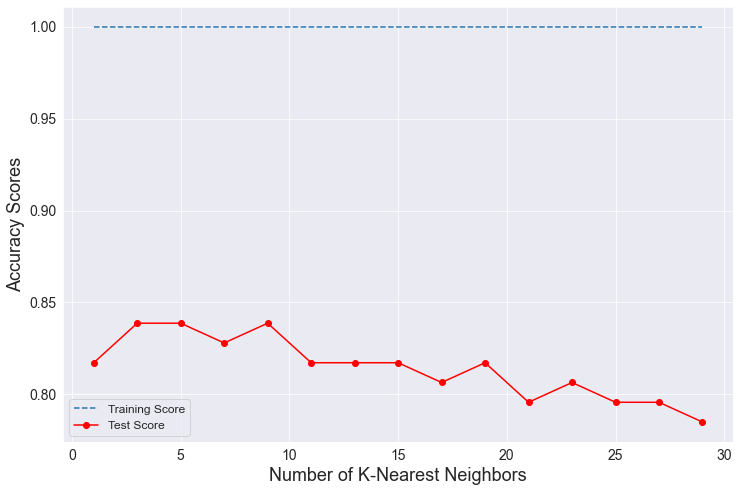

In [66]:
# Let's visualize our training and testing scores for different values of k in KNN ML algorithm

plt.plot(range(1,30,2),train_scores,'--',label="Training Score")
plt.plot(range(1,30,2),test_scores,'r-o',label='Test Score')
plt.xlabel('Number of K-Nearest Neighbors')
plt.ylabel('Accuracy Scores')
plt.legend()


For k=5, our model is performing the best. Let's choose that value of k=5 and do our final fitting.

In [67]:
knn = KNeighborsClassifier(n_neighbors=5,weights='distance') # Creating an instance of KNN model

In [68]:
knn.fit(X_train,y_train) # Fitting the model

KNeighborsClassifier(weights='distance')

In [69]:
print("Accuracy of our training data is:",knn.score(X_train,y_train)) 
print("Accuracy of our test data is:",knn.score(X_test,y_test))

Accuracy of our training data is: 1.0
Accuracy of our test data is: 0.8387096774193549


Accuracy scores of training data is <b>1.0 </b> which is indicative that this model is performing extreme well on training data. May be too well which can be mistaken to be an overfit model, but if we see how the model is performing for rest of the values of k, it seems for training data, it is performing extremely well for all the values of k. That is, it is learning the training data too well.

Whereas, when it comes to the test or unseen data, it isn't performing as well as it is on training data but for k=5, it is performing the better than for rest of the values of k.

In [70]:
y_pred = knn.predict(X_test) # Model is making predictions on test data

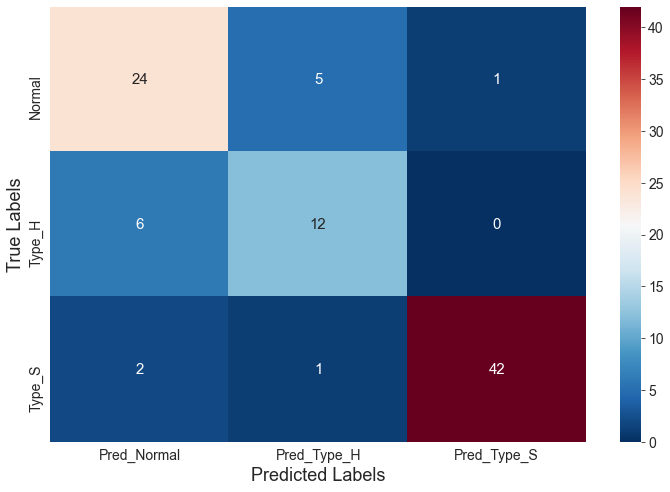

In [71]:
#Let's create confusion matrix of the model to evaluate the model's performance

cm = confusion_matrix(y_test,y_pred)
cm_df = pd.DataFrame(cm,index=knn.classes_,columns=["Pred_%s" %i for i in knn.classes_])
p = sns.heatmap(cm_df,annot=True,cmap='RdBu_r',annot_kws={'size':15})
_ = p.set(xlabel='Predicted Labels',ylabel='True Labels')

As we can see from the confusion matrix that <b>6 predictions are wrong for Normal and Type_H classes, and only 3 predictions are wrong for Type_S class</b>.

This was clear from our statistical analysis that Normal and Type_H classes had the most overlap. Hence, they were misclassified as one-another for most of the wrong predictions.

This is also from the fact that Type_S has the highest number of observations in the data-set, whereas, Type_H has the least number of observations in our dataset. Hence, Machine Learning algorithm learnt the characterstics of Type_S class better than the other two classes. Hence, it has the least misclassifications.

This can be further quantified by our classification report:

In [72]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      Normal       0.75      0.80      0.77        30
      Type_H       0.67      0.67      0.67        18
      Type_S       0.98      0.93      0.95        45

    accuracy                           0.84        93
   macro avg       0.80      0.80      0.80        93
weighted avg       0.84      0.84      0.84        93



<b>Let's Analyse this Classification Report in Detail:</b>

* <b>Precision</b>: This can be defined as the ratio of <b>True Positives to the Total Number of Predicted Positives</b>, i.e., 

$$ Precision = \frac {True Positives} {True Positives + False Positives} $$

So, from the above confusion matrix, we can find the respective values of True Positives and False Positives for all the classes and cross-verify our classification report:

$$ Precision_{Normal} = \frac {24} {24 + (6+2)} = 0.75 $$
$$ Precision_{Type_H} = \frac {12} {12 + (5+1)} = 0.67 $$
$$ Precision_{Type_S} = \frac {42} {42 + (1+0)} = 0.98 $$

* <b>Recall(or Sensitivity)</b>: It is defined as the ratio of <b>True Positives to the Actual Number of Positives</b>, i.e.,

$$ Recall = \frac {True Positives} {True Positives + False Negatives} $$

Similarly, we can cross verify our recall values of classification report with the confusion matrix:

$$ Recall_{Normal} = \frac {24} {24 +(5+1)} = 0.80 $$
$$ Recall_{Type_H} = \frac {12} {12 +(6+0)} = 0.67 $$
$$ Recall_{Type_S} = \frac {42} {42 +(2+1)} = 0.93 $$

* <b>F1-Score</b>: It is defined as the harmonic mean of Precision and Recall, i.e.,:

$$ F1 Score = \frac {2 * Precision * Recall} {Precision + Recall} $$ 

Similarly, this can also be cross-verified, after putting the values of Precision and Recall that we calculated above.

* Support column tells us how many observations were present of each class in our test set on which this model has performed the prediction and gave us this result. 

Precision and Recall, together give us the idea, how our model is performing overall and whether the motive which we are trying to achieve has been achieved or not. F1-Score simply sums up what Precision and Recall are conveying individually. These parameters shine when we have higly imbalanced classes in our data-set. 

Then comes our <b>Accuracy</b> parameter in our classification report, which we have already seen before we even built our confusion matrix. Let's now first understand what is accuracy:

* <b>Accuracy</b>: It is defined as the ratio of the True Predictions to the overall predictions by the models, i.e,:

$$ Accuracy = \frac {True Positives + True Negatives} {True Positives + True Negatives + False Positives + False Negatives}$$

Here, we can see that there are two averages, which are also accuracies:
* Macro Average: This is the uniform average/accuracy without taking into consideration the weights of each class in predictions.

* Weighted Average : This is the weighted average/accuracy where we have taken into consideration the weights of each class in predictions. 

We can see that weighted average is giving us the better results and even while defining the instance of our KNeighborClassifier, we have defined weights as distance. 

<b>Now, let's plot the ROC(Receiver Operating Characterstic) curve which is the graph between True Positive Rate (i.e., Recall) vs False Positive Rate (i.e. 1 - Specificity). Let's also see AUC(Area Under the Curve) in the same graph.

In [73]:
# Defining the function for ploting multi-class ROC curve 

def plot_multiclass_roc(clf, X_test, y_test, n_classes):
    y_score = clf.predict_proba(X_test)

    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # calculate dummies once
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # roc for each class
    fig, ax = plt.subplots()
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver Operating Characteristic Curve',fontsize=18.)
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %s' % (roc_auc[i], clf.classes_[i]))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()

I took help from official documentation of ROC in Python for creating this above function:<br>
https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html

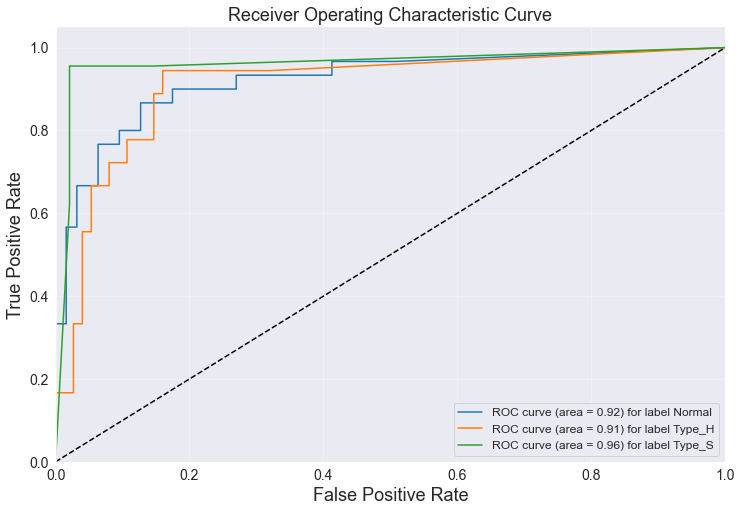

In [74]:
plot_multiclass_roc(knn, X_test, y_test, n_classes=3) # Calling the above function

Just like bias-variance trade-off for overfit models where we induce some bias to reduce the variance of the model considerably. Similarly, here we have True Positive Rate-False Positive Rate trade-off, where we are slightly compromising on our True Positive Rate to reduce the False Positive Rate of the model considerably. This graph helps us find the appropriate threshhold for our model where we can optimize our True Positive Rate while keeping False Positive Rate as low as possible.

Area Under the Curve gives us the idea how well our model is predicting the classes. Higher the AUC, better our model is. 

<b>-----------------------------------------------------------------------------------------------------------------------------------------------------------------------

Although we have tuned the hyperparameter of our model, which is n_neighbors, i.e., number of nearest neighbors which are going to vote for the prediction on the unseen data. 

But the best way to tune our hyperparameters is through GridSearchCV, which not only finds the best parameter out of the number of parameters we are passing into it but also does cross-validation, which gives us the most reliable result. This also ensures that our result isn't just a random one and that it could be generalized over the entire population of the data-set. 

<b>Let's perform the model building with GridSearchCV and how our result varied.

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=108,stratify=y)

Here, we are reducing our test size since here we are adopting 3-split approach:
1. Training Set
2. Validation Set (which Cross-Validation is going to perform test on after spliting our training set into several pieces and then taking 1 piece as validation set at a time and remaining pieces as training sets and perform model building on all those combinations of train and validation sets.)
3. Final Test set (On which we are going to perform our final predictions)

In [89]:
# Let's Scale our data using MinMaxScaler
mms = MinMaxScaler()

# Scaling the training Data
X_train_scaled = mms.fit_transform(X_train)

# Scaling the Test Data
X_test_scaled = mms.transform(X_test)

In [80]:
# Creating an instance of K-Nearest Neighbor

knn = KNeighborsClassifier()

Using StratifiedShuffleSplit inside the GridSearchCV to ensure that whenever the training data is split into pieces for cross-validation, it is also split in the same proportion as the classes are in the data-set

In [108]:
#Here we have passed n_splits=10 means it will split training data into 10 pieces for cross-validation
# Also, here I have kept test size as 30% and kept the random state same through out as 108

stratified_split = StratifiedShuffleSplit(n_splits=5, test_size=0.30 , random_state=108)

Let us collect our tuning our parameters to pass in GridSearchCV to find the best parameters.

In [127]:
n_neighbors = range(1,40) # Number of K-Nearest Neighbors
weights = ['uniform','distance'] 

# Collecting both of these parameters in a grid
param_grid = dict(n_neighbors=n_neighbors,weights=weights) 

In [128]:
# Defining the instance of GridSearchCV and passing the necessary hyperparameters

grid_model = GridSearchCV(knn,param_grid=param_grid,scoring='accuracy',cv=stratified_split)

In [129]:
# Let's fit our model using GridSearchCV

grid_model.fit(X_train_scaled,y_train)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=108, test_size=0.3,
            train_size=None),
             estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 40),
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [130]:
# Let's find out the best parameters as per our GridSearchCV

grid_model.best_params_

{'n_neighbors': 12, 'weights': 'distance'}

Here, it is giving k=12 as the best value for number of nearest neighbors. Earlier, though our regular tuning method, we received k=5 as our vest value for number of nearest neighbors required to do appropriate prediction. 

Now, let's check out what is the accuracy this model is giving us:

In [134]:
y_pred_test = grid_model.predict(X_test_scaled)
y_pred_train = grid_model.predict(X_train_scaled)
print("Training Score is:",accuracy_score(y_train,y_pred_train))
print("Test Score is:",accuracy_score(y_test,y_pred_test))

Training Score is: 1.0
Test Score is: 0.851063829787234


Here, we can see that the test accuracy score has slightly improved from 84% to 85% in grid model compared to the regular tuning method. 

So, as far as choosing between k=5 and k=12 is concerned and which model to choose, it won't make much of a difference since our data set is quite small and in small data-sets, randomness also plays some part as to what accuracy we achieve. Hence, we can not conclusively say that k=5 in our previous model is bad and k=12 in our grid model is good. 

If we have more data, it would have been very helpful in conclusively deciding which one is better.

Text(0, 0.5, 'Respective Score for each K-NN')

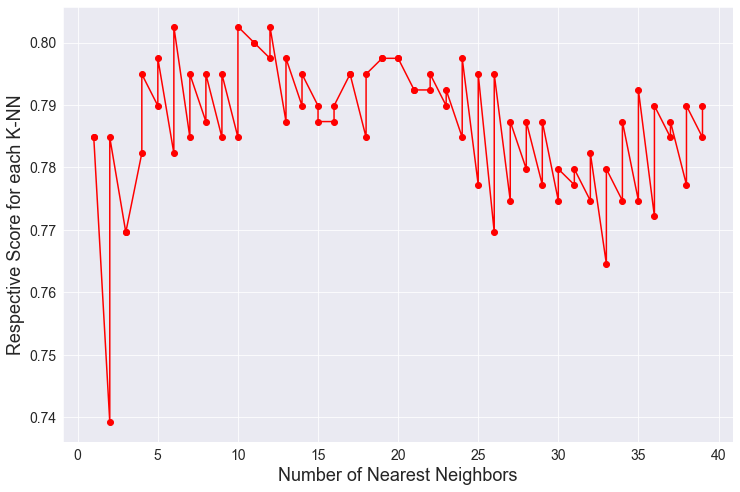

In [115]:
# Let's see how the test score varies for different value of k in grid model

data = pd.DataFrame(grid_model.cv_results_)[['param_n_neighbors','mean_test_score']].copy(deep=True)
p = plt.plot(data['param_n_neighbors'],data['mean_test_score'],'r-o')
plt.xlabel('Number of Nearest Neighbors')
plt.ylabel("Respective Score for each K-NN")

We can form the confusion matrix and classification report for grid model as well as we made for regular model. 

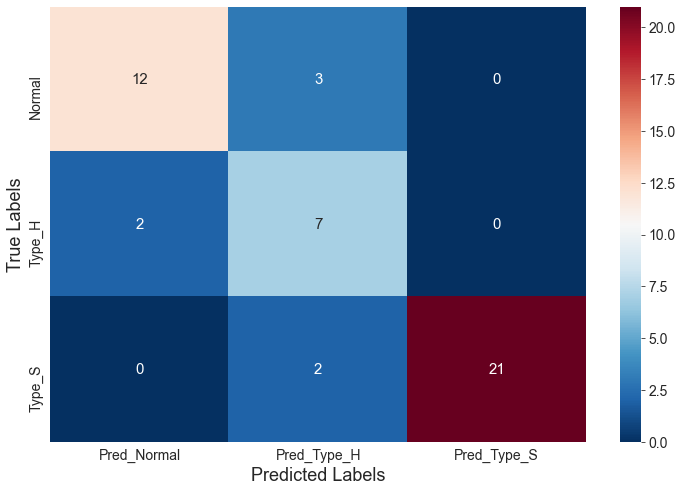

In [136]:
# Let's make confusion matrix for grid model

cm = confusion_matrix(y_test,y_pred_test)
cm_df = pd.DataFrame(cm,index=grid_model.classes_,columns=["Pred_%s" %i for i in grid_model.classes_])
p = sns.heatmap(cm_df,annot=True,cmap='RdBu_r',annot_kws={'size':15})
_ = p.set(xlabel='Predicted Labels',ylabel='True Labels')

In [120]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

      Normal       0.86      0.80      0.83        15
      Type_H       0.58      0.78      0.67         9
      Type_S       1.00      0.91      0.95        23

    accuracy                           0.85        47
   macro avg       0.81      0.83      0.82        47
weighted avg       0.87      0.85      0.86        47



Here, we can see from confusion matrix and classification report that some of the evaluation metrics have slightly improved than our regular model, which is a good sign, except Precision value for Type_H. This is understandable since number of Type_H observations have further reduced in predictions in grid model since we took just 15% of the total data-set compared to 30% reserved for testing in regular model building. Hence, it is more or less the same as before. 

Whereas, some metrics have improved and our overall accuracy has also improved with this method.

<a id='6'></a>
## 6. Conclusion and improvisation:

So, our problem statement says that a medical research team wants to predict the condition of the patient depending on the received test results.

Through the data provided to us, <b>we were able to predict the condition of the patients with overall 84% accuracy. </b>

But as for the analysis of individual classes is concerned, we were not able to predict all the classes with similar precision. We were able to predict the condition of Type_S patients the most accuractely, while the most inaccurate or the least accurate predictions were of Type_H patients.

This is understandable due to the differences in the number of observations of all the classes. We have the maximum number of observations of Type_S patients, that's why model is able to learn that condition better and is able to predict it more accurately, whereas, observations of Type_H patients are the least. Hence, model is not able to learn this condition as accurately as it should have. Same can be said for Normal patients whose observation are also quite less compared to Type_S patients.

Second reason could be that Type_S may be more separable and different than the other two. Hence, model is able to define a clear distinction between Type_S and other two classes. Whereas, Normal and Type_H patients must have been some similarity in features so that model is not able to define a clear distinction between these two classes. 

But we can not conclude the second point with confidence since we need more observations to conclude that. Right now, we can say that this is a situation of underfitting where model needs more obervation to learn all the classes more accurately. 

### Suggestions:

<b>Quality</b>: The quality of the data seems reasonably good since in such less number of observations, we are able to get a decently accurate model for predictions. Although, I think there was 1 wrongly entered observation in S_Degree since it defied all the other values of S_Degree by a wide margin. But due to lack of domain knowledge and relevant information it is difficult to conclude such a thing. Secondly, I found many observations belonging to the same classes have been entered with multiple names, which seems either data collection process is completely manual or there are multiple sources from where data is collected. Either way, this issue of uniformity needs to be addressed. But overall, I would say that quality of the data is good, relevant and helpful in predicting the condition of a patient. 

<b>Quantity</b>: That's where all the problem is. We don't have sufficient data to make a better predicting model for all the classes. As seen from the results of Type_S patients that even in just 150 observations, our model is able to give excellent results, we can say that for Type_H and Normal patients as well, if we had around 150 observations each, we would have been able to build a very high performing model. Hence, I would suggest that the data collection team should collect more data in general and specifically of Type_H patients. 

<b>Variety</b>: We have just dealt with the structured tabular data in our model building process and used a supervised learning method which deals with only structured data. But as far as variety of the data is concerned, it is always helpful to collect more and more data in any form that we could. Like, it may be helpful if the data collection team could collect photograph of each patient, video of their behavior during the condition, etc. In that case, we could use several other different algorithms which not only deal with structured but also with unstructured data, to build an overall better model.

<b>Velocity</b>: Since we are not doing any real-time analysis. So it would be difficult to comment on the velocity of the data. But as far as the entire process is concerned, it is always beneficial to collect the data as fast as possible, so that we could come up with better treatment as soon as possible. This would certainly help more and more people to come out of these conditions. 

<b>Veracity</b>: Again, it is hard to comment on this since for us the source is arbitrary but reliable and most of the units are masked to protect the privacy of the patients. Hence, we have done all the analysis under the assumption that data provided to us is free from abnormalities or any bias. And as far as noise in the data is concerned, we have done an extenive data exploration and for the most part, data is free from noise, as it is evident that in such less obversations, we are able to build a decent model.